## Regression with SciPy Griddata vs ANN

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.griddata.html

In [1]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adadelta, Adam
np.random.seed(2018)


/home/philipp/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/philipp/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/home/philipp/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Sample generation

In [2]:
def func(x1, x2):
    """3D - Target function"""
    return x1*(1-x1)*np.cos(4*np.pi*x1) * np.sin(4*np.pi*x2**2)**2

def get_samples(N):
    X = np.random.rand(N, 2)  # N x 2
    y = func(X[:, 0], X[:, 1])  # N x 1
    return X, y
    
# Train data set
X_train, y_train = get_samples(1000)

# Grid data for testing
n = 100
grid_x1, grid_x2 = np.mgrid[0:1:100j, 0:1:100j]

X_test = np.vstack((grid_x1.flatten(), grid_x2.flatten())).T
y_test = func(X_test[:, 0], X_test[:, 1])

### Take a look at the target function

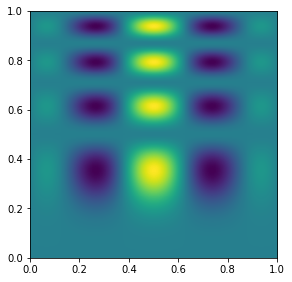

In [3]:
plt.subplot(224)
plt.imshow(func(*np.mgrid[0:1:1000j, 0:1:1000j]).T, extent=(0,1,0,1), origin='lower')
gcf = plt.gcf()
gcf.set_size_inches(10, 10);

# Training

### Scikit-learn MLP

In [11]:
kwargs = dict(hidden_layer_sizes=[128, 64, 32, 16], solver='lbfgs', max_iter=20000,
              verbose=True, batch_size=1000, random_state=2018)

scikit_model = MLPRegressor(activation="relu", **kwargs)

%time scikit_model.fit(X_train, y_train)
%time res_sklearn = scikit_model.predict(X_test).reshape((n, n))

CPU times: user 26.8 s, sys: 36.6 s, total: 1min 3s
Wall time: 8.28 s
CPU times: user 160 ms, sys: 148 ms, total: 308 ms
Wall time: 40.8 ms


### Keras MLP

In [5]:
activation='tanh'
hidden_layer_sizes=[128, 64, 32, 16]

keras_model = Sequential()
 
keras_model.add(Dense(hidden_layer_sizes[0], activation=activation, input_shape=(2, )))

for hl_size in hidden_layer_sizes[1: ]:
    keras_model.add(Dense(hl_size, activation=activation))

keras_model.add(Dense(1))
keras_model.compile(loss='mean_squared_error', optimizer=Adam())
keras_model.save_weights('cache.h5')
keras_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 11,265
Trainable params: 11,265
Non-trainable params: 0
_________________________________________________________________


In [6]:
keras_model.load_weights('cache.h5')  # re-initialize Keras model weights
keras_history = keras_model.fit(X_train, y_train, batch_size=1000, epochs=20000, validation_split=0.0)
res_keras=keras_model.predict(X_test).reshape((n, n))

Epoch 1/20000
1000/1000 [==============================] - 1s 511us/step - loss: 0.0747
Epoch 2/20000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0114
Epoch 3/20000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0124
Epoch 4/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0294
Epoch 5/20000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0302
Epoch 6/20000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0192
Epoch 7/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0087
Epoch 8/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0054
Epoch 9/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0086
Epoch 10/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0135
Epoch 11/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0158
Epoch 12/20000
1000/1000 [=======================

1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 96/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 97/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 98/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 99/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 100/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 101/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 102/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 103/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 104/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 105/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 106/20000
1000/1000 [=========================

Epoch 189/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 190/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 191/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 192/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 193/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 194/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 195/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 196/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 197/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 198/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 199/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 200/20000
1000/1000 [=====

1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 283/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 284/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 285/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 286/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 287/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 288/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 289/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 290/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 291/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 292/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 293/20000
1000/1000 [=====================

Epoch 376/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 377/20000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0051
Epoch 378/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 379/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 380/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 381/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 382/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0051
Epoch 383/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 384/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 385/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 386/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 387/20000
1000/1000 [=====

1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 470/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 471/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 472/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 473/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 474/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 475/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 476/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 477/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 478/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 479/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 480/20000
1000/1000 [=====================

Epoch 563/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 564/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 565/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 566/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 567/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 568/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 569/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 570/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 571/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 572/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 573/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 574/20000
1000/1000 [=====

Epoch 657/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 658/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 659/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 660/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 661/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 662/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 663/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 664/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 665/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 666/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 667/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 668/20000
1000/1000 [=====

1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 751/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 752/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 753/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 754/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 755/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 756/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0051
Epoch 757/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0051
Epoch 758/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0051
Epoch 759/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0051
Epoch 760/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 761/20000
1000/1000 [=====================

Epoch 844/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0051
Epoch 845/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 846/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0051
Epoch 847/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0051
Epoch 848/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 849/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0051
Epoch 850/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0051
Epoch 851/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 852/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0051
Epoch 853/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0051
Epoch 854/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0051
Epoch 855/20000
1000/1000 [=====

1000/1000 [==============================] - 0s 5us/step - loss: 0.0050
Epoch 938/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0050
Epoch 939/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0050
Epoch 940/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0050
Epoch 941/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0050
Epoch 942/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0050
Epoch 943/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0050
Epoch 944/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0050
Epoch 945/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0050
Epoch 946/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0050
Epoch 947/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0050
Epoch 948/20000
1000/1000 [=====================

Epoch 1030/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0049
Epoch 1031/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0049
Epoch 1032/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0049
Epoch 1033/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0049
Epoch 1034/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0049
Epoch 1035/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0049
Epoch 1036/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0049
Epoch 1037/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0048
Epoch 1038/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0048
Epoch 1039/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0048
Epoch 1040/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0048
Epoch 1041/20000
1000

1000/1000 [==============================] - 0s 4us/step - loss: 0.0035
Epoch 1123/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0034
Epoch 1124/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0034
Epoch 1125/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0034
Epoch 1126/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0033
Epoch 1127/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1128/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0033
Epoch 1129/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0032
Epoch 1130/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0032
Epoch 1131/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0032
Epoch 1132/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0031
Epoch 1133/20000
1000/1000 [==========

Epoch 1215/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0023
Epoch 1216/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0023
Epoch 1217/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0023
Epoch 1218/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0023
Epoch 1219/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0023
Epoch 1220/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0023
Epoch 1221/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0023
Epoch 1222/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0023
Epoch 1223/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0023
Epoch 1224/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0023
Epoch 1225/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0023
Epoch 1226/20000
1000

1000/1000 [==============================] - 0s 5us/step - loss: 0.0022
Epoch 1308/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0022
Epoch 1309/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0022
Epoch 1310/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0022
Epoch 1311/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0022
Epoch 1312/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0022
Epoch 1313/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0022
Epoch 1314/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0022
Epoch 1315/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0022
Epoch 1316/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0022
Epoch 1317/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0022
Epoch 1318/20000
1000/1000 [==========

Epoch 1400/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1401/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1402/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0021
Epoch 1403/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1404/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1405/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1406/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1407/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1408/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1409/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1410/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0021
Epoch 1411/20000
1000

Epoch 1493/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1494/20000
1000/1000 [==============================] - 0s 10us/step - loss: 0.0020
Epoch 1495/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1496/20000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0020
Epoch 1497/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0020
Epoch 1498/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0020
Epoch 1499/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1500/20000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0020
Epoch 1501/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0020
Epoch 1502/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0020
Epoch 1503/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0020
Epoch 1504/20000
100

1000/1000 [==============================] - 0s 5us/step - loss: 0.0019
Epoch 1586/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0019
Epoch 1587/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0019
Epoch 1588/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0019
Epoch 1589/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0019
Epoch 1590/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0019
Epoch 1591/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0019
Epoch 1592/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0019
Epoch 1593/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0019
Epoch 1594/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0019
Epoch 1595/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0019
Epoch 1596/20000
1000/1000 [==========

Epoch 1678/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0018
Epoch 1679/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0018
Epoch 1680/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0018
Epoch 1681/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 1682/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 1683/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 1684/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0018
Epoch 1685/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0018
Epoch 1686/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0018
Epoch 1687/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0018
Epoch 1688/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 1689/20000
1000

1000/1000 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 1771/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0018
Epoch 1772/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 1773/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0018
Epoch 1774/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 1775/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0018
Epoch 1776/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 1777/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0018
Epoch 1778/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0018
Epoch 1779/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0018
Epoch 1780/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0018
Epoch 1781/20000
1000/1000 [==========

Epoch 1863/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1864/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1865/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1866/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1867/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1868/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1869/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1870/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1871/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1872/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1873/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1874/20000
1000

1000/1000 [==============================] - 0s 6us/step - loss: 0.0017
Epoch 1956/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0017
Epoch 1957/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017
Epoch 1958/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1959/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1960/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017
Epoch 1961/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1962/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0017
Epoch 1963/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0017
Epoch 1964/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0017
Epoch 1965/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0017
Epoch 1966/20000
1000/1000 [==========

Epoch 2048/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0016
Epoch 2049/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0016
Epoch 2050/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0016
Epoch 2051/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 2052/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0016
Epoch 2053/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 2054/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 2055/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 2056/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 2057/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 2058/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 2059/20000
1000

1000/1000 [==============================] - 0s 5us/step - loss: 0.0016
Epoch 2141/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0016
Epoch 2142/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 2143/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0016
Epoch 2144/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0016
Epoch 2145/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0016
Epoch 2146/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0016
Epoch 2147/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0016
Epoch 2148/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0016
Epoch 2149/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 2150/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 2151/20000
1000/1000 [==========

Epoch 2233/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0015
Epoch 2234/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0015
Epoch 2235/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0015
Epoch 2236/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0015
Epoch 2237/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0015
Epoch 2238/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0015
Epoch 2239/20000
1000/1000 [==============================] - 0s 3us/step - loss: 0.0015
Epoch 2240/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0015
Epoch 2241/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0015
Epoch 2242/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0015
Epoch 2243/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0015
Epoch 2244/20000
1000

1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2326/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2327/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2328/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 2329/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0014
Epoch 2330/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2331/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 2332/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 2333/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0014
Epoch 2334/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2335/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 2336/20000
1000/1000 [==========

Epoch 2418/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2419/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 2420/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 2421/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 2422/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2423/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2424/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2425/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 2426/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2427/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 2428/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2429/20000
1000

1000/1000 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 2511/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 2512/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 2513/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 2514/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2515/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 2516/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2517/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0014
Epoch 2518/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0014
Epoch 2519/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 2520/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0013
Epoch 2521/20000
1000/1000 [==========

Epoch 2603/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2604/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 2605/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 2606/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0012
Epoch 2607/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0012
Epoch 2608/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 2609/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2610/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0012
Epoch 2611/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0012
Epoch 2612/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0012
Epoch 2613/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2614/20000
1000

1000/1000 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 2696/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0012
Epoch 2697/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2698/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2699/20000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0012
Epoch 2700/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2701/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2702/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2703/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 2704/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2705/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0012
Epoch 2706/20000
1000/1000 [=========

Epoch 2788/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 2789/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 2790/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0012
Epoch 2791/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2792/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 2793/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0012
Epoch 2794/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2795/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0012
Epoch 2796/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2797/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0012
Epoch 2798/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0012
Epoch 2799/20000
1000

1000/1000 [==============================] - 0s 6us/step - loss: 0.0011
Epoch 2881/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2882/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0011
Epoch 2883/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 2884/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2885/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 2886/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 2887/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2888/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2889/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2890/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2891/20000
1000/1000 [==========

Epoch 2973/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2974/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2975/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2976/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2977/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2978/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2979/20000
1000/1000 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 2980/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0011
Epoch 2981/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 2982/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011
Epoch 2983/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0011
Epoch 2984/20000
1000

Epoch 3065/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0011
Epoch 3066/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 3067/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 3068/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3069/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0010
Epoch 3070/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3071/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0010
Epoch 3072/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0010
Epoch 3073/20000
1000/1000 [==============================] - 0s 12us/step - loss: 0.0010
Epoch 3074/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3075/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3076/20000
100

Epoch 3157/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3158/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 3159/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3160/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0010
Epoch 3161/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 3162/20000
1000/1000 [==============================] - 0s 9us/step - loss: 0.0010
Epoch 3163/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0010
Epoch 3164/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3165/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0010
Epoch 3166/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3167/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3168/20000
1000

1000/1000 [==============================] - 0s 6us/step - loss: 0.0011
Epoch 3250/20000
1000/1000 [==============================] - 0s 8us/step - loss: 0.0011
Epoch 3251/20000
1000/1000 [==============================] - 0s 7us/step - loss: 0.0011
Epoch 3252/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0011
Epoch 3253/20000
1000/1000 [==============================] - 0s 5us/step - loss: 0.0011
Epoch 3254/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3255/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3256/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3257/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3258/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3259/20000
1000/1000 [==============================] - 0s 6us/step - loss: 0.0010
Epoch 3260/20000
1000/1000 [==========

Epoch 3339/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.8384e-04
Epoch 3340/20000
1000/1000 [==============================] - 0s 6us/step - loss: 9.8365e-04
Epoch 3341/20000
1000/1000 [==============================] - 0s 7us/step - loss: 9.8347e-04
Epoch 3342/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.8330e-04
Epoch 3343/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.8314e-04
Epoch 3344/20000
1000/1000 [==============================] - 0s 6us/step - loss: 9.8298e-04
Epoch 3345/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.8283e-04
Epoch 3346/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.8269e-04
Epoch 3347/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.8258e-04
Epoch 3348/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.8252e-04
Epoch 3349/20000
1000/1000 [==============================] - 0s 9us/s

Epoch 3428/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.6956e-04
Epoch 3429/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.6941e-04
Epoch 3430/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.6919e-04
Epoch 3431/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.6897e-04
Epoch 3432/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.6880e-04
Epoch 3433/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.6868e-04
Epoch 3434/20000
1000/1000 [==============================] - 0s 6us/step - loss: 9.6857e-04
Epoch 3435/20000
1000/1000 [==============================] - 0s 6us/step - loss: 9.6841e-04
Epoch 3436/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.6823e-04
Epoch 3437/20000
1000/1000 [==============================] - 0s 6us/step - loss: 9.6804e-04
Epoch 3438/20000
1000/1000 [==============================] - 0s 6us/s

1000/1000 [==============================] - 0s 4us/step - loss: 9.5614e-04
Epoch 3517/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.5599e-04
Epoch 3518/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.5584e-04
Epoch 3519/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.5569e-04
Epoch 3520/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.5555e-04
Epoch 3521/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.5540e-04
Epoch 3522/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.5525e-04
Epoch 3523/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.5510e-04
Epoch 3524/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.5495e-04
Epoch 3525/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.5480e-04
Epoch 3526/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.546

Epoch 3605/20000
1000/1000 [==============================] - 0s 6us/step - loss: 9.8810e-04
Epoch 3606/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.6648e-04
Epoch 3607/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.4415e-04
Epoch 3608/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.5214e-04
Epoch 3609/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.6950e-04
Epoch 3610/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.6478e-04
Epoch 3611/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.4696e-04
Epoch 3612/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.4402e-04
Epoch 3613/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.5568e-04
Epoch 3614/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.5898e-04
Epoch 3615/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 4us/step - loss: 9.3110e-04
Epoch 3694/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.3096e-04
Epoch 3695/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.3081e-04
Epoch 3696/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.3067e-04
Epoch 3697/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.3053e-04
Epoch 3698/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.3039e-04
Epoch 3699/20000
1000/1000 [==============================] - 0s 6us/step - loss: 9.3025e-04
Epoch 3700/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.3010e-04
Epoch 3701/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.2996e-04
Epoch 3702/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.2982e-04
Epoch 3703/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.296

Epoch 3782/20000
1000/1000 [==============================] - 0s 9us/step - loss: 9.1807e-04
Epoch 3783/20000
1000/1000 [==============================] - 0s 17us/step - loss: 9.1792e-04
Epoch 3784/20000
1000/1000 [==============================] - 0s 12us/step - loss: 9.1777e-04
Epoch 3785/20000
1000/1000 [==============================] - 0s 8us/step - loss: 9.1762e-04
Epoch 3786/20000
1000/1000 [==============================] - 0s 8us/step - loss: 9.1747e-04
Epoch 3787/20000
1000/1000 [==============================] - 0s 11us/step - loss: 9.1731e-04
Epoch 3788/20000
1000/1000 [==============================] - 0s 8us/step - loss: 9.1717e-04
Epoch 3789/20000
1000/1000 [==============================] - 0s 12us/step - loss: 9.1702e-04
Epoch 3790/20000
1000/1000 [==============================] - 0s 8us/step - loss: 9.1687e-04
Epoch 3791/20000
1000/1000 [==============================] - 0s 23us/step - loss: 9.1673e-04
Epoch 3792/20000
1000/1000 [==============================] - 0s 

1000/1000 [==============================] - 0s 4us/step - loss: 9.0510e-04
Epoch 3871/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.0501e-04
Epoch 3872/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.0482e-04
Epoch 3873/20000
1000/1000 [==============================] - 0s 9us/step - loss: 9.0459e-04
Epoch 3874/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.0440e-04
Epoch 3875/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.0428e-04
Epoch 3876/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.0418e-04
Epoch 3877/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.0403e-04
Epoch 3878/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.0383e-04
Epoch 3879/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.0364e-04
Epoch 3880/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.034

Epoch 3959/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.9078e-04
Epoch 3960/20000
1000/1000 [==============================] - 0s 10us/step - loss: 8.9061e-04
Epoch 3961/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.9044e-04
Epoch 3962/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.9027e-04
Epoch 3963/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.9010e-04
Epoch 3964/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.8993e-04
Epoch 3965/20000
1000/1000 [==============================] - 0s 7us/step - loss: 8.8976e-04
Epoch 3966/20000
1000/1000 [==============================] - 0s 14us/step - loss: 8.8959e-04
Epoch 3967/20000
1000/1000 [==============================] - 0s 14us/step - loss: 8.8942e-04
Epoch 3968/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.8925e-04
Epoch 3969/20000
1000/1000 [==============================] - 0s 7u

Epoch 4048/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.7518e-04
Epoch 4049/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.7468e-04
Epoch 4050/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.7446e-04
Epoch 4051/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.7447e-04
Epoch 4052/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.7444e-04
Epoch 4053/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.7417e-04
Epoch 4054/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.7378e-04
Epoch 4055/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.7347e-04
Epoch 4056/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.7334e-04
Epoch 4057/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.7327e-04
Epoch 4058/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 4us/step - loss: 8.5641e-04
Epoch 4137/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5618e-04
Epoch 4138/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.5595e-04
Epoch 4139/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.5572e-04
Epoch 4140/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.5549e-04
Epoch 4141/20000
1000/1000 [==============================] - 0s 8us/step - loss: 8.5525e-04
Epoch 4142/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5502e-04
Epoch 4143/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5478e-04
Epoch 4144/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5455e-04
Epoch 4145/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5431e-04
Epoch 4146/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.540

Epoch 4225/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.3338e-04
Epoch 4226/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.3309e-04
Epoch 4227/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.3280e-04
Epoch 4228/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.3251e-04
Epoch 4229/20000
1000/1000 [==============================] - 0s 10us/step - loss: 8.3222e-04
Epoch 4230/20000
1000/1000 [==============================] - 0s 8us/step - loss: 8.3192e-04
Epoch 4231/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.3163e-04
Epoch 4232/20000
1000/1000 [==============================] - 0s 8us/step - loss: 8.3134e-04
Epoch 4233/20000
1000/1000 [==============================] - 0s 7us/step - loss: 8.3104e-04
Epoch 4234/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.3075e-04
Epoch 4235/20000
1000/1000 [==============================] - 0s 6us/

1000/1000 [==============================] - 0s 4us/step - loss: 8.0634e-04
Epoch 4314/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.0593e-04
Epoch 4315/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0548e-04
Epoch 4316/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0510e-04
Epoch 4317/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0480e-04
Epoch 4318/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0453e-04
Epoch 4319/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.0423e-04
Epoch 4320/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0385e-04
Epoch 4321/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.0346e-04
Epoch 4322/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.0309e-04
Epoch 4323/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.027

Epoch 4402/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.7408e-04
Epoch 4403/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.7369e-04
Epoch 4404/20000
1000/1000 [==============================] - 0s 8us/step - loss: 7.7331e-04
Epoch 4405/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.7292e-04
Epoch 4406/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.7253e-04
Epoch 4407/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.7215e-04
Epoch 4408/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.7176e-04
Epoch 4409/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.7137e-04
Epoch 4410/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.7098e-04
Epoch 4411/20000
1000/1000 [==============================] - 0s 6us/step - loss: 7.7059e-04
Epoch 4412/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 4us/step - loss: 7.4006e-04
Epoch 4491/20000
1000/1000 [==============================] - 0s 6us/step - loss: 7.3928e-04
Epoch 4492/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.3876e-04
Epoch 4493/20000
1000/1000 [==============================] - 0s 6us/step - loss: 7.3854e-04
Epoch 4494/20000
1000/1000 [==============================] - 0s 6us/step - loss: 7.3835e-04
Epoch 4495/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.3792e-04
Epoch 4496/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.3730e-04
Epoch 4497/20000
1000/1000 [==============================] - 0s 6us/step - loss: 7.3671e-04
Epoch 4498/20000
1000/1000 [==============================] - 0s 6us/step - loss: 7.3630e-04
Epoch 4499/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.3604e-04
Epoch 4500/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.357

Epoch 4579/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.0282e-04
Epoch 4580/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.0240e-04
Epoch 4581/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.0197e-04
Epoch 4582/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.0155e-04
Epoch 4583/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.0112e-04
Epoch 4584/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.0069e-04
Epoch 4585/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.0027e-04
Epoch 4586/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.9984e-04
Epoch 4587/20000
1000/1000 [==============================] - 0s 6us/step - loss: 6.9941e-04
Epoch 4588/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.9898e-04
Epoch 4589/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 4us/step - loss: 6.9496e-04
Epoch 4668/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.7820e-04
Epoch 4669/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.7930e-04
Epoch 4670/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.9394e-04
Epoch 4671/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.0064e-04
Epoch 4672/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.8644e-04
Epoch 4673/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.6699e-04
Epoch 4674/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.6654e-04
Epoch 4675/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.8093e-04
Epoch 4676/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.8509e-04
Epoch 4677/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.720

Epoch 4756/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2674e-04
Epoch 4757/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2630e-04
Epoch 4758/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2587e-04
Epoch 4759/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2543e-04
Epoch 4760/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2500e-04
Epoch 4761/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2457e-04
Epoch 4762/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2413e-04
Epoch 4763/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2370e-04
Epoch 4764/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2327e-04
Epoch 4765/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2283e-04
Epoch 4766/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 4us/step - loss: 6.1299e-04
Epoch 4845/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.9744e-04
Epoch 4846/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.9574e-04
Epoch 4847/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.0624e-04
Epoch 4848/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.1227e-04
Epoch 4849/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.0388e-04
Epoch 4850/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.9215e-04
Epoch 4851/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.9154e-04
Epoch 4852/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.9818e-04
Epoch 4853/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.9824e-04
Epoch 4854/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.909

Epoch 4933/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5617e-04
Epoch 4934/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5583e-04
Epoch 4935/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5548e-04
Epoch 4936/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5513e-04
Epoch 4937/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5478e-04
Epoch 4938/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5443e-04
Epoch 4939/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5408e-04
Epoch 4940/20000
1000/1000 [==============================] - 0s 9us/step - loss: 5.5374e-04
Epoch 4941/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5339e-04
Epoch 4942/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5305e-04
Epoch 4943/20000
1000/1000 [==============================] - 0s 6us/s

1000/1000 [==============================] - 0s 4us/step - loss: 5.2953e-04
Epoch 5022/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.2929e-04
Epoch 5023/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.2898e-04
Epoch 5024/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.2861e-04
Epoch 5025/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.2825e-04
Epoch 5026/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.2795e-04
Epoch 5027/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.2772e-04
Epoch 5028/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.2752e-04
Epoch 5029/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.2728e-04
Epoch 5030/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.2697e-04
Epoch 5031/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.266

Epoch 5110/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.0799e-04
Epoch 5111/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.0790e-04
Epoch 5112/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.0788e-04
Epoch 5113/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.0799e-04
Epoch 5114/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.0832e-04
Epoch 5115/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.0900e-04
Epoch 5116/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.1029e-04
Epoch 5117/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.1261e-04
Epoch 5118/20000
1000/1000 [==============================] - 0s 6us/step - loss: 5.1664e-04
Epoch 5119/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.2356e-04
Epoch 5120/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 5us/step - loss: 4.9239e-04
Epoch 5199/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.9223e-04
Epoch 5200/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.9209e-04
Epoch 5201/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.9195e-04
Epoch 5202/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.9180e-04
Epoch 5203/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.9164e-04
Epoch 5204/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.9146e-04
Epoch 5205/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.9130e-04
Epoch 5206/20000
1000/1000 [==============================] - 0s 7us/step - loss: 4.9115e-04
Epoch 5207/20000
1000/1000 [==============================] - 0s 8us/step - loss: 4.9100e-04
Epoch 5208/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.908

Epoch 5287/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.3089e-04
Epoch 5288/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.8304e-04
Epoch 5289/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.0014e-04
Epoch 5290/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.5681e-04
Epoch 5291/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.6426e-04
Epoch 5292/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.9450e-04
Epoch 5293/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.9514e-04
Epoch 5294/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.4188e-04
Epoch 5295/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.7061e-04
Epoch 5296/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.4686e-04
Epoch 5297/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 4us/step - loss: 4.7032e-04
Epoch 5376/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.7022e-04
Epoch 5377/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.7011e-04
Epoch 5378/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.7000e-04
Epoch 5379/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6989e-04
Epoch 5380/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.6979e-04
Epoch 5381/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.6969e-04
Epoch 5382/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.6959e-04
Epoch 5383/20000
1000/1000 [==============================] - 0s 7us/step - loss: 4.6948e-04
Epoch 5384/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.6938e-04
Epoch 5385/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.692

Epoch 5464/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6152e-04
Epoch 5465/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.6142e-04
Epoch 5466/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.6133e-04
Epoch 5467/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6123e-04
Epoch 5468/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6114e-04
Epoch 5469/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6104e-04
Epoch 5470/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.6095e-04
Epoch 5471/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.6086e-04
Epoch 5472/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6076e-04
Epoch 5473/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6067e-04
Epoch 5474/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 9us/step - loss: 4.5457e-04
Epoch 5553/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.5684e-04
Epoch 5554/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.5805e-04
Epoch 5555/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.5649e-04
Epoch 5556/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.5448e-04
Epoch 5557/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.5441e-04
Epoch 5558/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.5553e-04
Epoch 5559/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.5562e-04
Epoch 5560/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.5432e-04
Epoch 5561/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.5333e-04
Epoch 5562/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.537

Epoch 5641/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.4637e-04
Epoch 5642/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.4629e-04
Epoch 5643/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4621e-04
Epoch 5644/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.4613e-04
Epoch 5645/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.4605e-04
Epoch 5646/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.4597e-04
Epoch 5647/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4588e-04
Epoch 5648/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.4580e-04
Epoch 5649/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4572e-04
Epoch 5650/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4564e-04
Epoch 5651/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 5us/step - loss: 4.4422e-04
Epoch 5730/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.4215e-04
Epoch 5731/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.4246e-04
Epoch 5732/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.4431e-04
Epoch 5733/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.4489e-04
Epoch 5734/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4296e-04
Epoch 5735/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4033e-04
Epoch 5736/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.3959e-04
Epoch 5737/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4103e-04
Epoch 5738/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4249e-04
Epoch 5739/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.420

Epoch 5818/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.3271e-04
Epoch 5819/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.3263e-04
Epoch 5820/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.3256e-04
Epoch 5821/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.3248e-04
Epoch 5822/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.3241e-04
Epoch 5823/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.3233e-04
Epoch 5824/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.3225e-04
Epoch 5825/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.3218e-04
Epoch 5826/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.3210e-04
Epoch 5827/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.3202e-04
Epoch 5828/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 4us/step - loss: 4.3804e-04
Epoch 5907/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.7538e-04
Epoch 5908/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.9908e-04
Epoch 5909/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.8585e-04
Epoch 5910/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4934e-04
Epoch 5911/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.2698e-04
Epoch 5912/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.3575e-04
Epoch 5913/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.5765e-04
Epoch 5914/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6434e-04
Epoch 5915/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4829e-04
Epoch 5916/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.292

Epoch 5995/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.1963e-04
Epoch 5996/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1956e-04
Epoch 5997/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.1949e-04
Epoch 5998/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1942e-04
Epoch 5999/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1934e-04
Epoch 6000/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1927e-04
Epoch 6001/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.1919e-04
Epoch 6002/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.1912e-04
Epoch 6003/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.1904e-04
Epoch 6004/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.1897e-04
Epoch 6005/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 5us/step - loss: 4.1308e-04
Epoch 6084/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1303e-04
Epoch 6085/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1300e-04
Epoch 6086/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1299e-04
Epoch 6087/20000
1000/1000 [==============================] - 0s 9us/step - loss: 4.1302e-04
Epoch 6088/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1313e-04
Epoch 6089/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1335e-04
Epoch 6090/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.1379e-04
Epoch 6091/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.1457e-04
Epoch 6092/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1596e-04
Epoch 6093/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.183

Epoch 6172/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0657e-04
Epoch 6173/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0650e-04
Epoch 6174/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0640e-04
Epoch 6175/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.0630e-04
Epoch 6176/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0622e-04
Epoch 6177/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0616e-04
Epoch 6178/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.0610e-04
Epoch 6179/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0603e-04
Epoch 6180/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0595e-04
Epoch 6181/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0587e-04
Epoch 6182/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 5us/step - loss: 4.0054e-04
Epoch 6261/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.0029e-04
Epoch 6262/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.0005e-04
Epoch 6263/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.9991e-04
Epoch 6264/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.9989e-04
Epoch 6265/20000
1000/1000 [==============================] - 0s 10us/step - loss: 3.9992e-04
Epoch 6266/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.9991e-04
Epoch 6267/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.9982e-04
Epoch 6268/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.9967e-04
Epoch 6269/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.9951e-04
Epoch 6270/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.99

Epoch 6349/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.9338e-04
Epoch 6350/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.9331e-04
Epoch 6351/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.9323e-04
Epoch 6352/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.9315e-04
Epoch 6353/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.9307e-04
Epoch 6354/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.9300e-04
Epoch 6355/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.9292e-04
Epoch 6356/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.9284e-04
Epoch 6357/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.9277e-04
Epoch 6358/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.9269e-04
Epoch 6359/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 5us/step - loss: 3.8692e-04
Epoch 6438/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8706e-04
Epoch 6439/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8708e-04
Epoch 6440/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8688e-04
Epoch 6441/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8660e-04
Epoch 6442/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8643e-04
Epoch 6443/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8643e-04
Epoch 6444/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8647e-04
Epoch 6445/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8643e-04
Epoch 6446/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8627e-04
Epoch 6447/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.860

Epoch 6526/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7993e-04
Epoch 6527/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.7993e-04
Epoch 6528/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7999e-04
Epoch 6529/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8012e-04
Epoch 6530/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8037e-04
Epoch 6531/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8082e-04
Epoch 6532/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.8160e-04
Epoch 6533/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.8291e-04
Epoch 6534/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.8507e-04
Epoch 6535/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.8856e-04
Epoch 6536/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 4us/step - loss: 3.7336e-04
Epoch 6615/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7351e-04
Epoch 6616/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7374e-04
Epoch 6617/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7408e-04
Epoch 6618/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7463e-04
Epoch 6619/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7547e-04
Epoch 6620/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7678e-04
Epoch 6621/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7877e-04
Epoch 6622/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8176e-04
Epoch 6623/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8619e-04
Epoch 6624/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.926

Epoch 6703/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.6585e-04
Epoch 6704/20000
1000/1000 [==============================] - 0s 7us/step - loss: 3.6576e-04
Epoch 6705/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.6566e-04
Epoch 6706/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.6557e-04
Epoch 6707/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.6549e-04
Epoch 6708/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.6541e-04
Epoch 6709/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.6534e-04
Epoch 6710/20000
1000/1000 [==============================] - 0s 7us/step - loss: 3.6527e-04
Epoch 6711/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.6519e-04
Epoch 6712/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.6511e-04
Epoch 6713/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 5us/step - loss: 3.6266e-04
Epoch 6792/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.6192e-04
Epoch 6793/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.6397e-04
Epoch 6794/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.6554e-04
Epoch 6795/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.6478e-04
Epoch 6796/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.6255e-04
Epoch 6797/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.6081e-04
Epoch 6798/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.6058e-04
Epoch 6799/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.6125e-04
Epoch 6800/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.6163e-04
Epoch 6801/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.612

Epoch 6880/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5203e-04
Epoch 6881/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5196e-04
Epoch 6882/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5188e-04
Epoch 6883/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5181e-04
Epoch 6884/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5174e-04
Epoch 6885/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5167e-04
Epoch 6886/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5161e-04
Epoch 6887/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5156e-04
Epoch 6888/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5152e-04
Epoch 6889/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5149e-04
Epoch 6890/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 4us/step - loss: 3.4569e-04
Epoch 6969/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.4561e-04
Epoch 6970/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.4552e-04
Epoch 6971/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.4546e-04
Epoch 6972/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.4543e-04
Epoch 6973/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.4544e-04
Epoch 6974/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.4550e-04
Epoch 6975/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.4559e-04
Epoch 6976/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.4575e-04
Epoch 6977/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.4602e-04
Epoch 6978/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.464

Epoch 7057/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3966e-04
Epoch 7058/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3957e-04
Epoch 7059/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3946e-04
Epoch 7060/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3936e-04
Epoch 7061/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3928e-04
Epoch 7062/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3922e-04
Epoch 7063/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3917e-04
Epoch 7064/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3912e-04
Epoch 7065/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.3905e-04
Epoch 7066/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.3897e-04
Epoch 7067/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 6us/step - loss: 3.3841e-04
Epoch 7146/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.4137e-04
Epoch 7147/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.4629e-04
Epoch 7148/20000
1000/1000 [==============================] - 0s 7us/step - loss: 3.5449e-04
Epoch 7149/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.6766e-04
Epoch 7150/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8863e-04
Epoch 7151/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.1885e-04
Epoch 7152/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.5947e-04
Epoch 7153/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.9981e-04
Epoch 7154/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.2516e-04
Epoch 7155/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.061

Epoch 7234/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2864e-04
Epoch 7235/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2859e-04
Epoch 7236/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2851e-04
Epoch 7237/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2844e-04
Epoch 7238/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2837e-04
Epoch 7239/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2832e-04
Epoch 7240/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2827e-04
Epoch 7241/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2821e-04
Epoch 7242/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2815e-04
Epoch 7243/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2808e-04
Epoch 7244/20000
1000/1000 [==============================] - 0s 4us/s

Epoch 7323/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.4401e-04
Epoch 7324/20000
1000/1000 [==============================] - 0s 8us/step - loss: 3.7711e-04
Epoch 7325/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.8585e-04
Epoch 7326/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.6113e-04
Epoch 7327/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3058e-04
Epoch 7328/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.2596e-04
Epoch 7329/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.4481e-04
Epoch 7330/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5862e-04
Epoch 7331/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.4980e-04
Epoch 7332/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3029e-04
Epoch 7333/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 4us/step - loss: 3.1898e-04
Epoch 7412/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1893e-04
Epoch 7413/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1889e-04
Epoch 7414/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1885e-04
Epoch 7415/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1882e-04
Epoch 7416/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1880e-04
Epoch 7417/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1880e-04
Epoch 7418/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1882e-04
Epoch 7419/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1888e-04
Epoch 7420/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1900e-04
Epoch 7421/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.192

Epoch 7500/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1491e-04
Epoch 7501/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1481e-04
Epoch 7502/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1469e-04
Epoch 7503/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1460e-04
Epoch 7504/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1456e-04
Epoch 7505/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1455e-04
Epoch 7506/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1453e-04
Epoch 7507/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1448e-04
Epoch 7508/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1440e-04
Epoch 7509/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1432e-04
Epoch 7510/20000
1000/1000 [==============================] - 0s 7us/s

1000/1000 [==============================] - 0s 5us/step - loss: 3.1046e-04
Epoch 7589/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1041e-04
Epoch 7590/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1036e-04
Epoch 7591/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1031e-04
Epoch 7592/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.1026e-04
Epoch 7593/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1021e-04
Epoch 7594/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1017e-04
Epoch 7595/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1012e-04
Epoch 7596/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1007e-04
Epoch 7597/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1002e-04
Epoch 7598/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.099

Epoch 7677/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0702e-04
Epoch 7678/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0765e-04
Epoch 7679/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0756e-04
Epoch 7680/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0687e-04
Epoch 7681/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0652e-04
Epoch 7682/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0679e-04
Epoch 7683/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0706e-04
Epoch 7684/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.0684e-04
Epoch 7685/20000
1000/1000 [==============================] - 0s 7us/step - loss: 3.0642e-04
Epoch 7686/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0630e-04
Epoch 7687/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 9us/step - loss: 3.0264e-04
Epoch 7766/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0260e-04
Epoch 7767/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0255e-04
Epoch 7768/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0251e-04
Epoch 7769/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0246e-04
Epoch 7770/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0242e-04
Epoch 7771/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0237e-04
Epoch 7772/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0233e-04
Epoch 7773/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0228e-04
Epoch 7774/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0223e-04
Epoch 7775/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.021

Epoch 7854/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.9918e-04
Epoch 7855/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.9990e-04
Epoch 7856/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.9995e-04
Epoch 7857/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9926e-04
Epoch 7858/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.9866e-04
Epoch 7859/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9871e-04
Epoch 7860/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9912e-04
Epoch 7861/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9925e-04
Epoch 7862/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9891e-04
Epoch 7863/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9848e-04
Epoch 7864/20000
1000/1000 [==============================] - 0s 4us/s

Epoch 7943/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3642e-04
Epoch 7944/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0467e-04
Epoch 7945/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5579e-04
Epoch 7946/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.0700e-04
Epoch 7947/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.9105e-04
Epoch 7948/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3271e-04
Epoch 7949/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0735e-04
Epoch 7950/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3121e-04
Epoch 7951/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5326e-04
Epoch 7952/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3879e-04
Epoch 7953/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 4us/step - loss: 2.9153e-04
Epoch 8032/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9149e-04
Epoch 8033/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9145e-04
Epoch 8034/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9141e-04
Epoch 8035/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9136e-04
Epoch 8036/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.9131e-04
Epoch 8037/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9127e-04
Epoch 8038/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9123e-04
Epoch 8039/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9119e-04
Epoch 8040/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9114e-04
Epoch 8041/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.911

Epoch 8120/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8762e-04
Epoch 8121/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8758e-04
Epoch 8122/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8753e-04
Epoch 8123/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8749e-04
Epoch 8124/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.8744e-04
Epoch 8125/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.8740e-04
Epoch 8126/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.8735e-04
Epoch 8127/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8731e-04
Epoch 8128/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8726e-04
Epoch 8129/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8722e-04
Epoch 8130/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 5us/step - loss: 3.0218e-04
Epoch 8209/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.4079e-04
Epoch 8210/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7159e-04
Epoch 8211/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3369e-04
Epoch 8212/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.9566e-04
Epoch 8213/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1706e-04
Epoch 8214/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.4035e-04
Epoch 8215/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1453e-04
Epoch 8216/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.9078e-04
Epoch 8217/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0794e-04
Epoch 8218/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.202

Epoch 8297/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.8013e-04
Epoch 8298/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8007e-04
Epoch 8299/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.8003e-04
Epoch 8300/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7999e-04
Epoch 8301/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7994e-04
Epoch 8302/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7989e-04
Epoch 8303/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7984e-04
Epoch 8304/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7980e-04
Epoch 8305/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7975e-04
Epoch 8306/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7971e-04
Epoch 8307/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 4us/step - loss: 2.7594e-04
Epoch 8386/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7589e-04
Epoch 8387/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7584e-04
Epoch 8388/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7579e-04
Epoch 8389/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7575e-04
Epoch 8390/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7570e-04
Epoch 8391/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7566e-04
Epoch 8392/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7563e-04
Epoch 8393/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7560e-04
Epoch 8394/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7559e-04
Epoch 8395/20000
1000/1000 [==============================] - 0s 8us/step - loss: 2.756

Epoch 8474/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7175e-04
Epoch 8475/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7170e-04
Epoch 8476/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7165e-04
Epoch 8477/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7159e-04
Epoch 8478/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7153e-04
Epoch 8479/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7148e-04
Epoch 8480/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7142e-04
Epoch 8481/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7136e-04
Epoch 8482/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7130e-04
Epoch 8483/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.7124e-04
Epoch 8484/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 16us/step - loss: 2.8810e-04
Epoch 8563/20000
1000/1000 [==============================] - 0s 8us/step - loss: 3.0170e-04
Epoch 8564/20000
1000/1000 [==============================] - 0s 9us/step - loss: 3.2304e-04
Epoch 8565/20000
1000/1000 [==============================] - 0s 8us/step - loss: 3.5462e-04
Epoch 8566/20000
1000/1000 [==============================] - 0s 8us/step - loss: 3.9559e-04
Epoch 8567/20000
1000/1000 [==============================] - 0s 10us/step - loss: 4.3825e-04
Epoch 8568/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.6014e-04
Epoch 8569/20000
1000/1000 [==============================] - 0s 10us/step - loss: 4.3907e-04
Epoch 8570/20000
1000/1000 [==============================] - 0s 9us/step - loss: 3.7226e-04
Epoch 8571/20000
1000/1000 [==============================] - 0s 8us/step - loss: 3.0101e-04
Epoch 8572/20000
1000/1000 [==============================] - 0s 11us/step - loss: 2

1000/1000 [==============================] - 0s 5us/step - loss: 2.6246e-04
Epoch 8651/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.6239e-04
Epoch 8652/20000
1000/1000 [==============================] - 0s 7us/step - loss: 2.6234e-04
Epoch 8653/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.6229e-04
Epoch 8654/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.6224e-04
Epoch 8655/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.6218e-04
Epoch 8656/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.6211e-04
Epoch 8657/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.6205e-04
Epoch 8658/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.6199e-04
Epoch 8659/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.6193e-04
Epoch 8660/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.618

Epoch 8739/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.5710e-04
Epoch 8740/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.5704e-04
Epoch 8741/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5697e-04
Epoch 8742/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5691e-04
Epoch 8743/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.5685e-04
Epoch 8744/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5678e-04
Epoch 8745/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5672e-04
Epoch 8746/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5666e-04
Epoch 8747/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5660e-04
Epoch 8748/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5653e-04
Epoch 8749/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 6us/step - loss: 2.4645e-04
Epoch 8916/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.4638e-04
Epoch 8917/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.4631e-04
Epoch 8918/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.4624e-04
Epoch 8919/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.4618e-04
Epoch 8920/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.4611e-04
Epoch 8921/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4604e-04
Epoch 8922/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4597e-04
Epoch 8923/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.4590e-04
Epoch 8924/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4583e-04
Epoch 8925/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.457

Epoch 9004/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4078e-04
Epoch 9005/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4052e-04
Epoch 9006/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4041e-04
Epoch 9007/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4045e-04
Epoch 9008/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4044e-04
Epoch 9009/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4029e-04
Epoch 9010/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.4011e-04
Epoch 9011/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.4004e-04
Epoch 9012/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.4005e-04
Epoch 9013/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4002e-04
Epoch 9014/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 4us/step - loss: 3.7940e-04
Epoch 9093/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.8585e-04
Epoch 9094/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3695e-04
Epoch 9095/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.5864e-04
Epoch 9096/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0997e-04
Epoch 9097/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.2878e-04
Epoch 9098/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9345e-04
Epoch 9099/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4713e-04
Epoch 9100/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.3887e-04
Epoch 9101/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.6605e-04
Epoch 9102/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.853

Epoch 9181/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2804e-04
Epoch 9182/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2797e-04
Epoch 9183/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2789e-04
Epoch 9184/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2781e-04
Epoch 9185/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2773e-04
Epoch 9186/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2765e-04
Epoch 9187/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2757e-04
Epoch 9188/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2750e-04
Epoch 9189/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2742e-04
Epoch 9190/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2734e-04
Epoch 9191/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 6us/step - loss: 2.2097e-04
Epoch 9270/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2089e-04
Epoch 9271/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2081e-04
Epoch 9272/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.2072e-04
Epoch 9273/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2064e-04
Epoch 9274/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2056e-04
Epoch 9275/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2049e-04
Epoch 9276/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2041e-04
Epoch 9277/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2035e-04
Epoch 9278/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2031e-04
Epoch 9279/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.203

Epoch 9358/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1433e-04
Epoch 9359/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1419e-04
Epoch 9360/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1397e-04
Epoch 9361/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1392e-04
Epoch 9362/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1392e-04
Epoch 9363/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1381e-04
Epoch 9364/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1366e-04
Epoch 9365/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1360e-04
Epoch 9366/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1356e-04
Epoch 9367/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1344e-04
Epoch 9368/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 4us/step - loss: 2.1902e-04
Epoch 9447/20000
1000/1000 [==============================] - 0s 11us/step - loss: 2.1810e-04
Epoch 9448/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1834e-04
Epoch 9449/20000
1000/1000 [==============================] - 0s 8us/step - loss: 2.1705e-04
Epoch 9450/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1544e-04
Epoch 9451/20000
1000/1000 [==============================] - 0s 9us/step - loss: 2.1557e-04
Epoch 9452/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1620e-04
Epoch 9453/20000
1000/1000 [==============================] - 0s 7us/step - loss: 2.1461e-04
Epoch 9454/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1121e-04
Epoch 9455/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.0922e-04
Epoch 9456/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.10

Epoch 9535/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.9939e-04
Epoch 9536/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9930e-04
Epoch 9537/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9921e-04
Epoch 9538/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9912e-04
Epoch 9539/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9903e-04
Epoch 9540/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9894e-04
Epoch 9541/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9885e-04
Epoch 9542/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.9876e-04
Epoch 9543/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9867e-04
Epoch 9544/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9858e-04
Epoch 9545/20000
1000/1000 [==============================] - 0s 6us/s

1000/1000 [==============================] - 0s 6us/step - loss: 1.9485e-04
Epoch 9624/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.9207e-04
Epoch 9625/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9422e-04
Epoch 9626/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9684e-04
Epoch 9627/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9575e-04
Epoch 9628/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9264e-04
Epoch 9629/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9171e-04
Epoch 9630/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9338e-04
Epoch 9631/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9454e-04
Epoch 9632/20000
1000/1000 [==============================] - 0s 8us/step - loss: 1.9338e-04
Epoch 9633/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.915

Epoch 9712/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8407e-04
Epoch 9713/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8398e-04
Epoch 9714/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8388e-04
Epoch 9715/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8379e-04
Epoch 9716/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8370e-04
Epoch 9717/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8361e-04
Epoch 9718/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8352e-04
Epoch 9719/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8342e-04
Epoch 9720/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8333e-04
Epoch 9721/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8324e-04
Epoch 9722/20000
1000/1000 [==============================] - 0s 4us/s

1000/1000 [==============================] - 0s 5us/step - loss: 1.7750e-04
Epoch 9801/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7691e-04
Epoch 9802/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.7629e-04
Epoch 9803/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7617e-04
Epoch 9804/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7643e-04
Epoch 9805/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7652e-04
Epoch 9806/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7623e-04
Epoch 9807/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7581e-04
Epoch 9808/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7562e-04
Epoch 9809/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7568e-04
Epoch 9810/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.757

Epoch 9889/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7662e-04
Epoch 9890/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7185e-04
Epoch 9891/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6901e-04
Epoch 9892/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6998e-04
Epoch 9893/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7261e-04
Epoch 9894/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7365e-04
Epoch 9895/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7208e-04
Epoch 9896/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6958e-04
Epoch 9897/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6837e-04
Epoch 9898/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6901e-04
Epoch 9899/20000
1000/1000 [==============================] - 0s 5us/s

1000/1000 [==============================] - 0s 5us/step - loss: 1.6099e-04
Epoch 9978/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.6090e-04
Epoch 9979/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6081e-04
Epoch 9980/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6072e-04
Epoch 9981/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.6063e-04
Epoch 9982/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6054e-04
Epoch 9983/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6045e-04
Epoch 9984/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6036e-04
Epoch 9985/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6027e-04
Epoch 9986/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6018e-04
Epoch 9987/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.600

Epoch 10065/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.5509e-04
Epoch 10066/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.5515e-04
Epoch 10067/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.5654e-04
Epoch 10068/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5608e-04
Epoch 10069/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.5430e-04
Epoch 10070/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.5399e-04
Epoch 10071/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.5510e-04
Epoch 10072/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.5528e-04
Epoch 10073/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.5408e-04
Epoch 10074/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.5336e-04
Epoch 10075/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 8us/step - loss: 1.4673e-04
Epoch 10153/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4664e-04
Epoch 10154/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4656e-04
Epoch 10155/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.4648e-04
Epoch 10156/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.4639e-04
Epoch 10157/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.4631e-04
Epoch 10158/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4623e-04
Epoch 10159/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4614e-04
Epoch 10160/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.4606e-04
Epoch 10161/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.4598e-04
Epoch 10162/20000
1000/1000 [==============================] - 0s 7us/step - l

Epoch 10240/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4478e-04
Epoch 10241/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.4000e-04
Epoch 10242/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4330e-04
Epoch 10243/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4712e-04
Epoch 10244/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.4455e-04
Epoch 10245/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4053e-04
Epoch 10246/20000
1000/1000 [==============================] - 0s 9us/step - loss: 1.4108e-04
Epoch 10247/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4337e-04
Epoch 10248/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.4249e-04
Epoch 10249/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4018e-04
Epoch 10250/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 1.3324e-04
Epoch 10328/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3316e-04
Epoch 10329/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3308e-04
Epoch 10330/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3300e-04
Epoch 10331/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3293e-04
Epoch 10332/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.3285e-04
Epoch 10333/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3277e-04
Epoch 10334/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3269e-04
Epoch 10335/20000
1000/1000 [==============================] - 0s 3us/step - loss: 1.3262e-04
Epoch 10336/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3254e-04
Epoch 10337/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 10415/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.2762e-04
Epoch 10416/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2701e-04
Epoch 10417/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2751e-04
Epoch 10418/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2820e-04
Epoch 10419/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2813e-04
Epoch 10420/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2731e-04
Epoch 10421/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2660e-04
Epoch 10422/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2658e-04
Epoch 10423/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2701e-04
Epoch 10424/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2721e-04
Epoch 10425/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 1.2051e-04
Epoch 10503/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2043e-04
Epoch 10504/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2036e-04
Epoch 10505/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2028e-04
Epoch 10506/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2021e-04
Epoch 10507/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2014e-04
Epoch 10508/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2006e-04
Epoch 10509/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1999e-04
Epoch 10510/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1991e-04
Epoch 10511/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.1984e-04
Epoch 10512/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 10590/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1359e-04
Epoch 10591/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8458e-04
Epoch 10592/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5018e-04
Epoch 10593/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2357e-04
Epoch 10594/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1511e-04
Epoch 10595/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2500e-04
Epoch 10596/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4295e-04
Epoch 10597/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5495e-04
Epoch 10598/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5249e-04
Epoch 10599/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3831e-04
Epoch 10600/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 6us/step - loss: 1.0837e-04
Epoch 10678/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0830e-04
Epoch 10679/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0823e-04
Epoch 10680/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0816e-04
Epoch 10681/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0809e-04
Epoch 10682/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0802e-04
Epoch 10683/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.0795e-04
Epoch 10684/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0787e-04
Epoch 10685/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0780e-04
Epoch 10686/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0773e-04
Epoch 10687/20000
1000/1000 [==============================] - 0s 3us/step - l

Epoch 10765/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0282e-04
Epoch 10766/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0320e-04
Epoch 10767/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0345e-04
Epoch 10768/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0327e-04
Epoch 10769/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0278e-04
Epoch 10770/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0237e-04
Epoch 10771/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0227e-04
Epoch 10772/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0242e-04
Epoch 10773/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0257e-04
Epoch 10774/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0253e-04
Epoch 10775/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 8us/step - loss: 1.2445e-04
Epoch 10853/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1256e-04
Epoch 10854/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0181e-04
Epoch 10855/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.9652e-05
Epoch 10856/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0508e-04
Epoch 10857/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1106e-04
Epoch 10858/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1172e-04
Epoch 10859/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0671e-04
Epoch 10860/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0088e-04
Epoch 10861/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.8603e-05
Epoch 10862/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 10940/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0282e-04
Epoch 10941/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.7248e-05
Epoch 10942/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.4180e-05
Epoch 10943/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.4493e-05
Epoch 10944/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.6637e-05
Epoch 10945/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.8373e-05
Epoch 10946/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.8317e-05
Epoch 10947/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.6580e-05
Epoch 10948/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.4317e-05
Epoch 10949/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.2717e-05
Epoch 10950/20000
1000/1000 [==============================]

Epoch 11028/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5811e-05
Epoch 11029/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5748e-05
Epoch 11030/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5685e-05
Epoch 11031/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5623e-05
Epoch 11032/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5559e-05
Epoch 11033/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.5496e-05
Epoch 11034/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.5433e-05
Epoch 11035/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5370e-05
Epoch 11036/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5307e-05
Epoch 11037/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5244e-05
Epoch 11038/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 8.1277e-05
Epoch 11116/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0958e-05
Epoch 11117/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.1266e-05
Epoch 11118/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.1511e-05
Epoch 11119/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.1243e-05
Epoch 11120/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.0795e-05
Epoch 11121/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.0670e-05
Epoch 11122/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0857e-05
Epoch 11123/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.0932e-05
Epoch 11124/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.0703e-05
Epoch 11125/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 11203/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5801e-05
Epoch 11204/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5743e-05
Epoch 11205/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5686e-05
Epoch 11206/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5628e-05
Epoch 11207/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5570e-05
Epoch 11208/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5513e-05
Epoch 11209/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5456e-05
Epoch 11210/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5399e-05
Epoch 11211/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5343e-05
Epoch 11212/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5287e-05
Epoch 11213/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 7.1432e-05
Epoch 11291/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.1509e-05
Epoch 11292/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.1377e-05
Epoch 11293/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.1139e-05
Epoch 11294/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.0993e-05
Epoch 11295/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.1004e-05
Epoch 11296/20000
1000/1000 [==============================] - 0s 6us/step - loss: 7.1058e-05
Epoch 11297/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.1023e-05
Epoch 11298/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.0888e-05
Epoch 11299/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.0749e-05
Epoch 11300/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 11378/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.3083e-05
Epoch 11379/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.8081e-05
Epoch 11380/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.8492e-05
Epoch 11381/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.2301e-05
Epoch 11382/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.3404e-05
Epoch 11383/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.0307e-05
Epoch 11384/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.7232e-05
Epoch 11385/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.7611e-05
Epoch 11386/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.9824e-05
Epoch 11387/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.0336e-05
Epoch 11388/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 6.2844e-05
Epoch 11466/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2798e-05
Epoch 11467/20000
1000/1000 [==============================] - 0s 7us/step - loss: 6.2752e-05
Epoch 11468/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2706e-05
Epoch 11469/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2659e-05
Epoch 11470/20000
1000/1000 [==============================] - 0s 7us/step - loss: 6.2613e-05
Epoch 11471/20000
1000/1000 [==============================] - 0s 6us/step - loss: 6.2567e-05
Epoch 11472/20000
1000/1000 [==============================] - 0s 6us/step - loss: 6.2521e-05
Epoch 11473/20000
1000/1000 [==============================] - 0s 6us/step - loss: 6.2475e-05
Epoch 11474/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2429e-05
Epoch 11475/20000
1000/1000 [==============================] - 0s 7us/step - l

Epoch 11553/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0445e-04
Epoch 11554/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.7723e-05
Epoch 11555/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.4577e-05
Epoch 11556/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.6007e-05
Epoch 11557/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.4143e-05
Epoch 11558/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.2357e-05
Epoch 11559/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.3355e-05
Epoch 11560/20000
1000/1000 [==============================] - 0s 8us/step - loss: 8.1769e-05
Epoch 11561/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.3994e-05
Epoch 11562/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.6939e-05
Epoch 11563/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 5.5591e-05
Epoch 11641/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5546e-05
Epoch 11642/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5504e-05
Epoch 11643/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5466e-05
Epoch 11644/20000
1000/1000 [==============================] - 0s 6us/step - loss: 5.5429e-05
Epoch 11645/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5391e-05
Epoch 11646/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5351e-05
Epoch 11647/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5310e-05
Epoch 11648/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5269e-05
Epoch 11649/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5230e-05
Epoch 11650/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 11728/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.4016e-05
Epoch 11729/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.6218e-05
Epoch 11730/20000
1000/1000 [==============================] - 0s 7us/step - loss: 5.6947e-05
Epoch 11731/20000
1000/1000 [==============================] - 0s 11us/step - loss: 5.5091e-05
Epoch 11732/20000
1000/1000 [==============================] - 0s 12us/step - loss: 5.2988e-05
Epoch 11733/20000
1000/1000 [==============================] - 0s 10us/step - loss: 5.2916e-05
Epoch 11734/20000
1000/1000 [==============================] - 0s 9us/step - loss: 5.4389e-05
Epoch 11735/20000
1000/1000 [==============================] - 0s 9us/step - loss: 5.5214e-05
Epoch 11736/20000
1000/1000 [==============================] - 0s 8us/step - loss: 5.4356e-05
Epoch 11737/20000
1000/1000 [==============================] - 0s 12us/step - loss: 5.2939e-05
Epoch 11738/20000
1000/1000 [===========================

Epoch 11816/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.8677e-05
Epoch 11817/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2448e-05
Epoch 11818/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.4171e-05
Epoch 11819/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.9800e-05
Epoch 11820/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.1310e-05
Epoch 11821/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5918e-05
Epoch 11822/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.9094e-05
Epoch 11823/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.8265e-05
Epoch 11824/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.4382e-05
Epoch 11825/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.0558e-05
Epoch 11826/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 4.6831e-05
Epoch 11904/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.6800e-05
Epoch 11905/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.6769e-05
Epoch 11906/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6739e-05
Epoch 11907/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6708e-05
Epoch 11908/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6677e-05
Epoch 11909/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6647e-05
Epoch 11910/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6616e-05
Epoch 11911/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.6586e-05
Epoch 11912/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6556e-05
Epoch 11913/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 11991/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.7622e-05
Epoch 11992/20000
1000/1000 [==============================] - 0s 7us/step - loss: 4.9129e-05
Epoch 11993/20000
1000/1000 [==============================] - 0s 7us/step - loss: 4.7821e-05
Epoch 11994/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.5394e-05
Epoch 11995/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4483e-05
Epoch 11996/20000
1000/1000 [==============================] - 0s 9us/step - loss: 4.5563e-05
Epoch 11997/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.6867e-05
Epoch 11998/20000
1000/1000 [==============================] - 0s 7us/step - loss: 4.6751e-05
Epoch 11999/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.5433e-05
Epoch 12000/20000
1000/1000 [==============================] - 0s 7us/step - loss: 4.4392e-05
Epoch 12001/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 4.2263e-05
Epoch 12079/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.2238e-05
Epoch 12080/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.2212e-05
Epoch 12081/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.2187e-05
Epoch 12082/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.2162e-05
Epoch 12083/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.2137e-05
Epoch 12084/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.2112e-05
Epoch 12085/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.2087e-05
Epoch 12086/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.2062e-05
Epoch 12087/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.2037e-05
Epoch 12088/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 12166/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1175e-05
Epoch 12167/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.1196e-05
Epoch 12168/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0635e-05
Epoch 12169/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.0223e-05
Epoch 12170/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.0368e-05
Epoch 12171/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.0706e-05
Epoch 12172/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.0705e-05
Epoch 12173/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.0362e-05
Epoch 12174/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0098e-05
Epoch 12175/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.0161e-05
Epoch 12176/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 8.1184e-05
Epoch 12254/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.4024e-05
Epoch 12255/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.4521e-05
Epoch 12256/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5703e-05
Epoch 12257/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.9333e-05
Epoch 12258/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.5133e-05
Epoch 12259/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.2257e-05
Epoch 12260/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.0663e-05
Epoch 12261/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.0979e-05
Epoch 12262/20000
1000/1000 [==============================] - 0s 6us/step - loss: 4.3375e-05
Epoch 12263/20000
1000/1000 [==============================] - 0s 7us/step - l

Epoch 12341/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.3257e-05
Epoch 12342/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7042e-05
Epoch 12343/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.9291e-05
Epoch 12344/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.6731e-05
Epoch 12345/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.4641e-05
Epoch 12346/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.8991e-05
Epoch 12347/20000
1000/1000 [==============================] - 0s 6us/step - loss: 5.7872e-05
Epoch 12348/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.2149e-05
Epoch 12349/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4692e-05
Epoch 12350/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8850e-05
Epoch 12351/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 6us/step - loss: 3.5293e-05
Epoch 12429/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5287e-05
Epoch 12430/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5286e-05
Epoch 12431/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5291e-05
Epoch 12432/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5304e-05
Epoch 12433/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5328e-05
Epoch 12434/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5367e-05
Epoch 12435/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.5429e-05
Epoch 12436/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5522e-05
Epoch 12437/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5659e-05
Epoch 12438/20000
1000/1000 [==============================] - 0s 6us/step - l

Epoch 12516/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3837e-05
Epoch 12517/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3851e-05
Epoch 12518/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3883e-05
Epoch 12519/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3904e-05
Epoch 12520/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3895e-05
Epoch 12521/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3854e-05
Epoch 12522/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3797e-05
Epoch 12523/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3742e-05
Epoch 12524/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3704e-05
Epoch 12525/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3687e-05
Epoch 12526/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 4.9156e-05
Epoch 12604/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.0771e-05
Epoch 12605/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.4154e-05
Epoch 12606/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.5843e-05
Epoch 12607/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3016e-05
Epoch 12608/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.6415e-05
Epoch 12609/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0725e-05
Epoch 12610/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.0886e-05
Epoch 12611/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7053e-05
Epoch 12612/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3403e-05
Epoch 12613/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 12691/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2795e-05
Epoch 12692/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2341e-05
Epoch 12693/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1819e-05
Epoch 12694/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1413e-05
Epoch 12695/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1228e-05
Epoch 12696/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1263e-05
Epoch 12697/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1439e-05
Epoch 12698/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1645e-05
Epoch 12699/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1786e-05
Epoch 12700/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.1810e-05
Epoch 12701/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 3.0316e-05
Epoch 12779/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0095e-05
Epoch 12780/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0029e-05
Epoch 12781/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0101e-05
Epoch 12782/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0230e-05
Epoch 12783/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0327e-05
Epoch 12784/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0338e-05
Epoch 12785/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0260e-05
Epoch 12786/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.0131e-05
Epoch 12787/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0007e-05
Epoch 12788/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 12866/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9650e-05
Epoch 12867/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0620e-05
Epoch 12868/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0896e-05
Epoch 12869/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0120e-05
Epoch 12870/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.9259e-05
Epoch 12871/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.9224e-05
Epoch 12872/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9809e-05
Epoch 12873/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0133e-05
Epoch 12874/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9783e-05
Epoch 12875/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9193e-05
Epoch 12876/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 2.7997e-05
Epoch 12954/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7985e-05
Epoch 12955/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7973e-05
Epoch 12956/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7961e-05
Epoch 12957/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7948e-05
Epoch 12958/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7936e-05
Epoch 12959/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7924e-05
Epoch 12960/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7912e-05
Epoch 12961/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7900e-05
Epoch 12962/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7888e-05
Epoch 12963/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 13041/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9015e-05
Epoch 13042/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1177e-05
Epoch 13043/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.0943e-05
Epoch 13044/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8752e-05
Epoch 13045/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7096e-05
Epoch 13046/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7452e-05
Epoch 13047/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.8864e-05
Epoch 13048/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.9445e-05
Epoch 13049/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8590e-05
Epoch 13050/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7349e-05
Epoch 13051/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 8.2912e-05
Epoch 13129/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.3256e-05
Epoch 13130/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.2234e-05
Epoch 13131/20000
1000/1000 [==============================] - 0s 7us/step - loss: 6.6807e-05
Epoch 13132/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.6414e-05
Epoch 13133/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0306e-05
Epoch 13134/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.6180e-05
Epoch 13135/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.8175e-05
Epoch 13136/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.0249e-05
Epoch 13137/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.3001e-05
Epoch 13138/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 13216/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5251e-05
Epoch 13217/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5235e-05
Epoch 13218/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5222e-05
Epoch 13219/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.5214e-05
Epoch 13220/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5207e-05
Epoch 13221/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5198e-05
Epoch 13222/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.5187e-05
Epoch 13223/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.5173e-05
Epoch 13224/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.5161e-05
Epoch 13225/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.5150e-05
Epoch 13226/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 3.5300e-05
Epoch 13304/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.4005e-05
Epoch 13305/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.9442e-05
Epoch 13306/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.5421e-05
Epoch 13307/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2677e-04
Epoch 13308/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8203e-04
Epoch 13309/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.3915e-04
Epoch 13310/20000
1000/1000 [==============================] - 0s 8us/step - loss: 2.5878e-04
Epoch 13311/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1527e-04
Epoch 13312/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2571e-04
Epoch 13313/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 13391/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3661e-05
Epoch 13392/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3670e-05
Epoch 13393/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3656e-05
Epoch 13394/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3630e-05
Epoch 13395/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3619e-05
Epoch 13396/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3622e-05
Epoch 13397/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3615e-05
Epoch 13398/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3594e-05
Epoch 13399/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3575e-05
Epoch 13400/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3571e-05
Epoch 13401/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 2.2865e-05
Epoch 13479/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2856e-05
Epoch 13480/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2847e-05
Epoch 13481/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2839e-05
Epoch 13482/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2831e-05
Epoch 13483/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2822e-05
Epoch 13484/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2814e-05
Epoch 13485/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2807e-05
Epoch 13486/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2801e-05
Epoch 13487/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2795e-05
Epoch 13488/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 13566/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2468e-05
Epoch 13567/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2368e-05
Epoch 13568/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2298e-05
Epoch 13569/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2305e-05
Epoch 13570/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2336e-05
Epoch 13571/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.2323e-05
Epoch 13572/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2262e-05
Epoch 13573/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2205e-05
Epoch 13574/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2187e-05
Epoch 13575/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2196e-05
Epoch 13576/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 2.4810e-05
Epoch 13654/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.4259e-05
Epoch 13655/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.3049e-05
Epoch 13656/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1951e-05
Epoch 13657/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1522e-05
Epoch 13658/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1813e-05
Epoch 13659/20000
1000/1000 [==============================] - 0s 8us/step - loss: 2.2443e-05
Epoch 13660/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2925e-05
Epoch 13661/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2958e-05
Epoch 13662/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2565e-05
Epoch 13663/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 13741/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0832e-05
Epoch 13742/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0824e-05
Epoch 13743/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0816e-05
Epoch 13744/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0808e-05
Epoch 13745/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0800e-05
Epoch 13746/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0792e-05
Epoch 13747/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0785e-05
Epoch 13748/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0777e-05
Epoch 13749/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0769e-05
Epoch 13750/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0761e-05
Epoch 13751/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 2.1887e-05
Epoch 13829/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1252e-05
Epoch 13830/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0472e-05
Epoch 13831/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0362e-05
Epoch 13832/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0844e-05
Epoch 13833/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1204e-05
Epoch 13834/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1000e-05
Epoch 13835/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0493e-05
Epoch 13836/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0224e-05
Epoch 13837/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0384e-05
Epoch 13838/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 13916/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9617e-05
Epoch 13917/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9611e-05
Epoch 13918/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9605e-05
Epoch 13919/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9600e-05
Epoch 13920/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9596e-05
Epoch 13921/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9594e-05
Epoch 13922/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9595e-05
Epoch 13923/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9599e-05
Epoch 13924/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9609e-05
Epoch 13925/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9628e-05
Epoch 13926/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 1.9203e-05
Epoch 14004/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9114e-05
Epoch 14005/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9049e-05
Epoch 14006/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9046e-05
Epoch 14007/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9085e-05
Epoch 14008/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9113e-05
Epoch 14009/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9100e-05
Epoch 14010/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9053e-05
Epoch 14011/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9008e-05
Epoch 14012/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8990e-05
Epoch 14013/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 14091/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8866e-05
Epoch 14092/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5633e-05
Epoch 14093/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2036e-05
Epoch 14094/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1596e-05
Epoch 14095/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3739e-05
Epoch 14096/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5091e-05
Epoch 14097/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3563e-05
Epoch 14098/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0525e-05
Epoch 14099/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8892e-05
Epoch 14100/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9873e-05
Epoch 14101/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 1.8299e-05
Epoch 14179/20000
1000/1000 [==============================] - 0s 8us/step - loss: 1.8441e-05
Epoch 14180/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8649e-05
Epoch 14181/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8954e-05
Epoch 14182/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.9405e-05
Epoch 14183/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0075e-05
Epoch 14184/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1068e-05
Epoch 14185/20000
1000/1000 [==============================] - 0s 7us/step - loss: 2.2553e-05
Epoch 14186/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4758e-05
Epoch 14187/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.8046e-05
Epoch 14188/20000
1000/1000 [==============================] - 0s 7us/step - l

Epoch 14266/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7479e-05
Epoch 14267/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7454e-05
Epoch 14268/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7432e-05
Epoch 14269/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.7416e-05
Epoch 14270/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7409e-05
Epoch 14271/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7407e-05
Epoch 14272/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7407e-05
Epoch 14273/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7407e-05
Epoch 14274/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7402e-05
Epoch 14275/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7393e-05
Epoch 14276/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 1.8523e-05
Epoch 14354/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8381e-05
Epoch 14355/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7715e-05
Epoch 14356/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7164e-05
Epoch 14357/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7135e-05
Epoch 14358/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7497e-05
Epoch 14359/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7803e-05
Epoch 14360/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.7740e-05
Epoch 14361/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.7376e-05
Epoch 14362/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7023e-05
Epoch 14363/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 14441/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7691e-05
Epoch 14442/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8393e-05
Epoch 14443/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8641e-05
Epoch 14444/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8332e-05
Epoch 14445/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7660e-05
Epoch 14446/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6968e-05
Epoch 14447/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6548e-05
Epoch 14448/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.6511e-05
Epoch 14449/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6770e-05
Epoch 14450/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7119e-05
Epoch 14451/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 1.6075e-05
Epoch 14529/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6116e-05
Epoch 14530/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6179e-05
Epoch 14531/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6278e-05
Epoch 14532/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6432e-05
Epoch 14533/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6672e-05
Epoch 14534/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7046e-05
Epoch 14535/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7634e-05
Epoch 14536/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8553e-05
Epoch 14537/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.0002e-05
Epoch 14538/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 14616/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6717e-05
Epoch 14617/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7006e-05
Epoch 14618/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7410e-05
Epoch 14619/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7984e-05
Epoch 14620/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8787e-05
Epoch 14621/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9881e-05
Epoch 14622/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1367e-05
Epoch 14623/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.3387e-05
Epoch 14624/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.6158e-05
Epoch 14625/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9902e-05
Epoch 14626/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 1.5236e-05
Epoch 14704/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5247e-05
Epoch 14705/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5263e-05
Epoch 14706/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.5291e-05
Epoch 14707/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.5338e-05
Epoch 14708/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5419e-05
Epoch 14709/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5549e-05
Epoch 14710/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.5757e-05
Epoch 14711/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.6082e-05
Epoch 14712/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6590e-05
Epoch 14713/20000
1000/1000 [==============================] - 0s 6us/step - l

Epoch 14791/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.4797e-05
Epoch 14792/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4767e-05
Epoch 14793/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4738e-05
Epoch 14794/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4725e-05
Epoch 14795/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4732e-05
Epoch 14796/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4753e-05
Epoch 14797/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.4776e-05
Epoch 14798/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4793e-05
Epoch 14799/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4806e-05
Epoch 14800/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4823e-05
Epoch 14801/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 1.4572e-05
Epoch 14879/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4537e-05
Epoch 14880/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4472e-05
Epoch 14881/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4409e-05
Epoch 14882/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4370e-05
Epoch 14883/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4363e-05
Epoch 14884/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4378e-05
Epoch 14885/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4396e-05
Epoch 14886/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4404e-05
Epoch 14887/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4394e-05
Epoch 14888/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 14966/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3939e-05
Epoch 14967/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3937e-05
Epoch 14968/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3937e-05
Epoch 14969/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3939e-05
Epoch 14970/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3943e-05
Epoch 14971/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3951e-05
Epoch 14972/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3965e-05
Epoch 14973/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3988e-05
Epoch 14974/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4024e-05
Epoch 14975/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4081e-05
Epoch 14976/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 6us/step - loss: 1.3667e-05
Epoch 15054/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3748e-05
Epoch 15055/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3786e-05
Epoch 15056/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.3739e-05
Epoch 15057/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3653e-05
Epoch 15058/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3604e-05
Epoch 15059/20000
1000/1000 [==============================] - 0s 8us/step - loss: 1.3618e-05
Epoch 15060/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3662e-05
Epoch 15061/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3681e-05
Epoch 15062/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3655e-05
Epoch 15063/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 15141/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5146e-05
Epoch 15142/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3991e-05
Epoch 15143/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3381e-05
Epoch 15144/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3532e-05
Epoch 15145/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4118e-05
Epoch 15146/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4600e-05
Epoch 15147/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4621e-05
Epoch 15148/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4195e-05
Epoch 15149/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3633e-05
Epoch 15150/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3272e-05
Epoch 15151/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 7us/step - loss: 1.5250e-05
Epoch 15229/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4729e-05
Epoch 15230/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3976e-05
Epoch 15231/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3300e-05
Epoch 15232/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2930e-05
Epoch 15233/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2929e-05
Epoch 15234/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3197e-05
Epoch 15235/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.3547e-05
Epoch 15236/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.3802e-05
Epoch 15237/20000
1000/1000 [==============================] - 0s 8us/step - loss: 1.3865e-05
Epoch 15238/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 15316/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.6156e-05
Epoch 15317/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.7141e-05
Epoch 15318/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0401e-04
Epoch 15319/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3302e-04
Epoch 15320/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5448e-04
Epoch 15321/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5428e-04
Epoch 15322/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2338e-04
Epoch 15323/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.1580e-05
Epoch 15324/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.6813e-05
Epoch 15325/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3232e-05
Epoch 15326/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 1.2296e-05
Epoch 15404/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2297e-05
Epoch 15405/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.2290e-05
Epoch 15406/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2278e-05
Epoch 15407/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2265e-05
Epoch 15408/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.2257e-05
Epoch 15409/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.2254e-05
Epoch 15410/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2254e-05
Epoch 15411/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2255e-05
Epoch 15412/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2252e-05
Epoch 15413/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 15491/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2609e-05
Epoch 15492/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2088e-05
Epoch 15493/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3149e-05
Epoch 15494/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3900e-05
Epoch 15495/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3253e-05
Epoch 15496/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2200e-05
Epoch 15497/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2100e-05
Epoch 15498/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2799e-05
Epoch 15499/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3128e-05
Epoch 15500/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2635e-05
Epoch 15501/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 1.1722e-05
Epoch 15579/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1746e-05
Epoch 15580/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1783e-05
Epoch 15581/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1841e-05
Epoch 15582/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1933e-05
Epoch 15583/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2077e-05
Epoch 15584/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2303e-05
Epoch 15585/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2659e-05
Epoch 15586/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3219e-05
Epoch 15587/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4104e-05
Epoch 15588/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 15666/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.6934e-05
Epoch 15667/20000
1000/1000 [==============================] - 0s 5us/step - loss: 4.8763e-05
Epoch 15668/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.6313e-05
Epoch 15669/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4706e-05
Epoch 15670/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.6314e-05
Epoch 15671/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.9150e-05
Epoch 15672/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.3885e-05
Epoch 15673/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.7139e-05
Epoch 15674/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3611e-05
Epoch 15675/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1721e-05
Epoch 15676/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 1.1152e-05
Epoch 15754/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1143e-05
Epoch 15755/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1136e-05
Epoch 15756/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1132e-05
Epoch 15757/20000
1000/1000 [==============================] - 0s 10us/step - loss: 1.1130e-05
Epoch 15758/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.1129e-05
Epoch 15759/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1128e-05
Epoch 15760/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1125e-05
Epoch 15761/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1121e-05
Epoch 15762/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1115e-05
Epoch 15763/20000
1000/1000 [==============================] - 0s 5us/step - 

Epoch 15841/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0850e-05
Epoch 15842/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0847e-05
Epoch 15843/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0844e-05
Epoch 15844/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0841e-05
Epoch 15845/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.0839e-05
Epoch 15846/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0836e-05
Epoch 15847/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0834e-05
Epoch 15848/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0832e-05
Epoch 15849/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0832e-05
Epoch 15850/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0833e-05
Epoch 15851/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 1.1147e-05
Epoch 15929/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1025e-05
Epoch 15930/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0774e-05
Epoch 15931/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0685e-05
Epoch 15932/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0805e-05
Epoch 15933/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0930e-05
Epoch 15934/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0890e-05
Epoch 15935/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0742e-05
Epoch 15936/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0655e-05
Epoch 15937/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0700e-05
Epoch 15938/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 16016/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0703e-05
Epoch 16017/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0871e-05
Epoch 16018/20000
1000/1000 [==============================] - 0s 9us/step - loss: 1.1141e-05
Epoch 16019/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1571e-05
Epoch 16020/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2264e-05
Epoch 16021/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.3375e-05
Epoch 16022/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.5177e-05
Epoch 16023/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.8049e-05
Epoch 16024/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2689e-05
Epoch 16025/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9882e-05
Epoch 16026/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 1.0215e-05
Epoch 16104/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0211e-05
Epoch 16105/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0190e-05
Epoch 16106/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0166e-05
Epoch 16107/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0153e-05
Epoch 16108/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0155e-05
Epoch 16109/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0164e-05
Epoch 16110/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0169e-05
Epoch 16111/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0165e-05
Epoch 16112/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0154e-05
Epoch 16113/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 16191/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0108e-05
Epoch 16192/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0196e-05
Epoch 16193/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0190e-05
Epoch 16194/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0101e-05
Epoch 16195/20000
1000/1000 [==============================] - 0s 6us/step - loss: 9.9905e-06
Epoch 16196/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.9223e-06
Epoch 16197/20000
1000/1000 [==============================] - 0s 6us/step - loss: 9.9212e-06
Epoch 16198/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.9674e-06
Epoch 16199/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0018e-05
Epoch 16200/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.0038e-05
Epoch 16201/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 9.9386e-06
Epoch 16279/20000
1000/1000 [==============================] - 0s 8us/step - loss: 9.7730e-06
Epoch 16280/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.8850e-06
Epoch 16281/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0136e-05
Epoch 16282/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0343e-05
Epoch 16283/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0385e-05
Epoch 16284/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0251e-05
Epoch 16285/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0028e-05
Epoch 16286/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.8261e-06
Epoch 16287/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.7273e-06
Epoch 16288/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 16366/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.5894e-05
Epoch 16367/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.9555e-05
Epoch 16368/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.9594e-05
Epoch 16369/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.6480e-05
Epoch 16370/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.0752e-05
Epoch 16371/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.4313e-05
Epoch 16372/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1033e-05
Epoch 16373/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0989e-05
Epoch 16374/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6224e-05
Epoch 16375/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9340e-05
Epoch 16376/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 3.1286e-05
Epoch 16454/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5273e-05
Epoch 16455/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7498e-05
Epoch 16456/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1970e-05
Epoch 16457/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0738e-05
Epoch 16458/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3098e-05
Epoch 16459/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6645e-05
Epoch 16460/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8860e-05
Epoch 16461/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8522e-05
Epoch 16462/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6016e-05
Epoch 16463/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 16541/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0301e-05
Epoch 16542/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6060e-05
Epoch 16543/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.8530e-05
Epoch 16544/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6145e-05
Epoch 16545/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.8341e-05
Epoch 16546/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7825e-05
Epoch 16547/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8765e-05
Epoch 16548/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4547e-05
Epoch 16549/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5631e-05
Epoch 16550/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9624e-05
Epoch 16551/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 1.0859e-05
Epoch 16629/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2988e-05
Epoch 16630/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4606e-05
Epoch 16631/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.5038e-05
Epoch 16632/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4194e-05
Epoch 16633/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2535e-05
Epoch 16634/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0757e-05
Epoch 16635/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.4792e-06
Epoch 16636/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.0177e-06
Epoch 16637/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.3171e-06
Epoch 16638/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 16716/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9534e-05
Epoch 16717/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.7531e-05
Epoch 16718/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.6416e-05
Epoch 16719/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.9729e-05
Epoch 16720/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.2883e-05
Epoch 16721/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.0393e-05
Epoch 16722/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0487e-05
Epoch 16723/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9541e-05
Epoch 16724/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.7185e-05
Epoch 16725/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.5862e-05
Epoch 16726/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 1.5210e-04
Epoch 16804/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2954e-04
Epoch 16805/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.9752e-05
Epoch 16806/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.0182e-05
Epoch 16807/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.9662e-06
Epoch 16808/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4111e-05
Epoch 16809/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.1834e-05
Epoch 16810/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.5778e-05
Epoch 16811/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.4299e-05
Epoch 16812/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9207e-05
Epoch 16813/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 16891/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.4047e-06
Epoch 16892/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.4025e-06
Epoch 16893/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.4005e-06
Epoch 16894/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.3984e-06
Epoch 16895/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.3958e-06
Epoch 16896/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.3931e-06
Epoch 16897/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.3904e-06
Epoch 16898/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.3875e-06
Epoch 16899/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.3844e-06
Epoch 16900/20000
1000/1000 [==============================] - 0s 7us/step - loss: 8.3811e-06
Epoch 16901/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 9.8216e-06
Epoch 16979/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4619e-05
Epoch 16980/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.6707e-05
Epoch 16981/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3918e-05
Epoch 16982/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.6255e-06
Epoch 16983/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.3080e-06
Epoch 16984/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.0437e-05
Epoch 16985/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2761e-05
Epoch 16986/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2491e-05
Epoch 16987/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0112e-05
Epoch 16988/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 17066/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.7736e-06
Epoch 17067/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7943e-05
Epoch 17068/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.9380e-05
Epoch 17069/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2307e-05
Epoch 17070/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3886e-05
Epoch 17071/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2755e-05
Epoch 17072/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.3326e-06
Epoch 17073/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2560e-05
Epoch 17074/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9291e-05
Epoch 17075/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1189e-05
Epoch 17076/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 7.9122e-06
Epoch 17154/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.9093e-06
Epoch 17155/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.9079e-06
Epoch 17156/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.9079e-06
Epoch 17157/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.9087e-06
Epoch 17158/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.9101e-06
Epoch 17159/20000
1000/1000 [==============================] - 0s 7us/step - loss: 7.9121e-06
Epoch 17160/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.9152e-06
Epoch 17161/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.9205e-06
Epoch 17162/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.9295e-06
Epoch 17163/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 17241/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.8103e-06
Epoch 17242/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.8748e-06
Epoch 17243/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.9035e-06
Epoch 17244/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.8731e-06
Epoch 17245/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.8122e-06
Epoch 17246/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.7678e-06
Epoch 17247/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.7654e-06
Epoch 17248/20000
1000/1000 [==============================] - 0s 9us/step - loss: 7.7936e-06
Epoch 17249/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.8203e-06
Epoch 17250/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.8213e-06
Epoch 17251/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 6us/step - loss: 2.4045e-05
Epoch 17329/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3709e-05
Epoch 17330/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3992e-05
Epoch 17331/20000
1000/1000 [==============================] - 0s 10us/step - loss: 2.1224e-05
Epoch 17332/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.4154e-05
Epoch 17333/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.8688e-05
Epoch 17334/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.1022e-05
Epoch 17335/20000
1000/1000 [==============================] - 0s 7us/step - loss: 9.5384e-06
Epoch 17336/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4320e-05
Epoch 17337/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8295e-05
Epoch 17338/20000
1000/1000 [==============================] - 0s 5us/step - 

Epoch 17416/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.4950e-06
Epoch 17417/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.4915e-06
Epoch 17418/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.4883e-06
Epoch 17419/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.4861e-06
Epoch 17420/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.4848e-06
Epoch 17421/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.4837e-06
Epoch 17422/20000
1000/1000 [==============================] - 0s 8us/step - loss: 7.4823e-06
Epoch 17423/20000
1000/1000 [==============================] - 0s 10us/step - loss: 7.4804e-06
Epoch 17424/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.4779e-06
Epoch 17425/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.4755e-06
Epoch 17426/20000
1000/1000 [==============================

1000/1000 [==============================] - 0s 8us/step - loss: 2.8469e-05
Epoch 17504/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.5961e-05
Epoch 17505/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.7824e-06
Epoch 17506/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.0557e-05
Epoch 17507/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8342e-05
Epoch 17508/20000
1000/1000 [==============================] - 0s 7us/step - loss: 2.1258e-05
Epoch 17509/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6365e-05
Epoch 17510/20000
1000/1000 [==============================] - 0s 6us/step - loss: 9.9360e-06
Epoch 17511/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5345e-06
Epoch 17512/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1966e-05
Epoch 17513/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 17591/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8140e-05
Epoch 17592/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0596e-05
Epoch 17593/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.2667e-05
Epoch 17594/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0247e-05
Epoch 17595/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.6706e-05
Epoch 17596/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7254e-05
Epoch 17597/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1506e-05
Epoch 17598/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.3635e-05
Epoch 17599/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.6974e-06
Epoch 17600/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.8446e-06
Epoch 17601/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 7.4790e-06
Epoch 17679/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.3496e-06
Epoch 17680/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.2259e-06
Epoch 17681/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.7027e-06
Epoch 17682/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.6038e-06
Epoch 17683/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.0386e-06
Epoch 17684/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.2611e-06
Epoch 17685/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5718e-06
Epoch 17686/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.1742e-06
Epoch 17687/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.1267e-06
Epoch 17688/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 17766/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0851e-05
Epoch 17767/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.2105e-05
Epoch 17768/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.3940e-05
Epoch 17769/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.5112e-05
Epoch 17770/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0556e-05
Epoch 17771/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.7959e-05
Epoch 17772/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.4175e-05
Epoch 17773/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.3646e-05
Epoch 17774/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.3175e-05
Epoch 17775/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0668e-05
Epoch 17776/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 8.0410e-06
Epoch 17854/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.5484e-06
Epoch 17855/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.2953e-06
Epoch 17856/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0406e-05
Epoch 17857/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2033e-05
Epoch 17858/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4439e-05
Epoch 17859/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7888e-05
Epoch 17860/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.2842e-05
Epoch 17861/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.9519e-05
Epoch 17862/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.8317e-05
Epoch 17863/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 17941/20000
1000/1000 [==============================] - 0s 7us/step - loss: 7.0574e-06
Epoch 17942/20000
1000/1000 [==============================] - 0s 6us/step - loss: 7.1948e-06
Epoch 17943/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.3906e-06
Epoch 17944/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.6768e-06
Epoch 17945/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.0970e-06
Epoch 17946/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.7309e-06
Epoch 17947/20000
1000/1000 [==============================] - 0s 8us/step - loss: 9.6806e-06
Epoch 17948/20000
1000/1000 [==============================] - 0s 8us/step - loss: 1.1137e-05
Epoch 17949/20000
1000/1000 [==============================] - 0s 15us/step - loss: 1.3318e-05
Epoch 17950/20000
1000/1000 [==============================] - 0s 16us/step - loss: 1.6647e-05
Epoch 17951/20000
1000/1000 [=============================

1000/1000 [==============================] - 0s 7us/step - loss: 6.7157e-06
Epoch 18029/20000
1000/1000 [==============================] - 0s 7us/step - loss: 6.6902e-06
Epoch 18030/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.6637e-06
Epoch 18031/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.6472e-06
Epoch 18032/20000
1000/1000 [==============================] - 0s 7us/step - loss: 6.6444e-06
Epoch 18033/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.6516e-06
Epoch 18034/20000
1000/1000 [==============================] - 0s 6us/step - loss: 6.6616e-06
Epoch 18035/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.6675e-06
Epoch 18036/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.6667e-06
Epoch 18037/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.6610e-06
Epoch 18038/20000
1000/1000 [==============================] - 0s 6us/step - l

Epoch 18116/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.6784e-06
Epoch 18117/20000
1000/1000 [==============================] - 0s 6us/step - loss: 6.5941e-06
Epoch 18118/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.5436e-06
Epoch 18119/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.5532e-06
Epoch 18120/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.5978e-06
Epoch 18121/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.6303e-06
Epoch 18122/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.6224e-06
Epoch 18123/20000
1000/1000 [==============================] - 0s 9us/step - loss: 6.5827e-06
Epoch 18124/20000
1000/1000 [==============================] - 0s 6us/step - loss: 6.5421e-06
Epoch 18125/20000
1000/1000 [==============================] - 0s 6us/step - loss: 6.5260e-06
Epoch 18126/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 8.1922e-06
Epoch 18204/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.5697e-06
Epoch 18205/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.8358e-06
Epoch 18206/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.6487e-06
Epoch 18207/20000
1000/1000 [==============================] - 0s 7us/step - loss: 7.0326e-06
Epoch 18208/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.4726e-06
Epoch 18209/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.4903e-06
Epoch 18210/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.0790e-06
Epoch 18211/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.6163e-06
Epoch 18212/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.4617e-06
Epoch 18213/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 18291/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.7534e-05
Epoch 18292/20000
1000/1000 [==============================] - 0s 9us/step - loss: 1.3930e-05
Epoch 18293/20000
1000/1000 [==============================] - 0s 7us/step - loss: 7.6205e-06
Epoch 18294/20000
1000/1000 [==============================] - 0s 9us/step - loss: 1.7319e-05
Epoch 18295/20000
1000/1000 [==============================] - 0s 6us/step - loss: 3.2140e-05
Epoch 18296/20000
1000/1000 [==============================] - 0s 8us/step - loss: 3.9321e-05
Epoch 18297/20000
1000/1000 [==============================] - 0s 7us/step - loss: 3.4545e-05
Epoch 18298/20000
1000/1000 [==============================] - 0s 12us/step - loss: 2.1383e-05
Epoch 18299/20000
1000/1000 [==============================] - 0s 11us/step - loss: 1.0674e-05
Epoch 18300/20000
1000/1000 [==============================] - 0s 6us/step - loss: 8.9629e-06
Epoch 18301/20000
1000/1000 [=============================

Epoch 18379/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2395e-06
Epoch 18380/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2401e-06
Epoch 18381/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2400e-06
Epoch 18382/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2386e-06
Epoch 18383/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2362e-06
Epoch 18384/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2332e-06
Epoch 18385/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2304e-06
Epoch 18386/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2283e-06
Epoch 18387/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2269e-06
Epoch 18388/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2262e-06
Epoch 18389/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 7.0647e-06
Epoch 18467/20000
1000/1000 [==============================] - 0s 6us/step - loss: 6.3884e-06
Epoch 18468/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2325e-06
Epoch 18469/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.5503e-06
Epoch 18470/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.9081e-06
Epoch 18471/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.9437e-06
Epoch 18472/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.6568e-06
Epoch 18473/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.3382e-06
Epoch 18474/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2498e-06
Epoch 18475/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.4063e-06
Epoch 18476/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 18554/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.6219e-06
Epoch 18555/20000
1000/1000 [==============================] - 0s 7us/step - loss: 8.0963e-06
Epoch 18556/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.7528e-06
Epoch 18557/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.1200e-06
Epoch 18558/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.9981e-06
Epoch 18559/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.4511e-06
Epoch 18560/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.7315e-06
Epoch 18561/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.1049e-06
Epoch 18562/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.7758e-06
Epoch 18563/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.7908e-06
Epoch 18564/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 8.9608e-06
Epoch 18642/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.5214e-06
Epoch 18643/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.2746e-06
Epoch 18644/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.3810e-06
Epoch 18645/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.5630e-06
Epoch 18646/20000
1000/1000 [==============================] - 0s 5us/step - loss: 7.3841e-06
Epoch 18647/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.7888e-06
Epoch 18648/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.2511e-06
Epoch 18649/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.2237e-06
Epoch 18650/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.6113e-06
Epoch 18651/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 18729/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6396e-05
Epoch 18730/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4666e-05
Epoch 18731/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1050e-05
Epoch 18732/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0978e-06
Epoch 18733/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.4599e-06
Epoch 18734/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.9196e-06
Epoch 18735/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.0887e-05
Epoch 18736/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1651e-05
Epoch 18737/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0672e-05
Epoch 18738/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.6042e-06
Epoch 18739/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 1.0427e-05
Epoch 18817/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2476e-05
Epoch 18818/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.5377e-05
Epoch 18819/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.9581e-05
Epoch 18820/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5273e-05
Epoch 18821/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3094e-05
Epoch 18822/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.2485e-05
Epoch 18823/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.3566e-05
Epoch 18824/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.2944e-05
Epoch 18825/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.9030e-05
Epoch 18826/20000
1000/1000 [==============================] - 0s 3us/step - l

Epoch 18904/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7340e-05
Epoch 18905/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.1954e-05
Epoch 18906/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7982e-05
Epoch 18907/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5697e-05
Epoch 18908/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.4398e-05
Epoch 18909/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.3353e-05
Epoch 18910/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.9711e-05
Epoch 18911/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.1365e-05
Epoch 18912/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5420e-05
Epoch 18913/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.3064e-05
Epoch 18914/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 9.3037e-06
Epoch 18992/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.1112e-05
Epoch 18993/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3819e-05
Epoch 18994/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.7779e-05
Epoch 18995/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.3443e-05
Epoch 18996/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.1070e-05
Epoch 18997/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0632e-05
Epoch 18998/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.0786e-05
Epoch 18999/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.9053e-05
Epoch 19000/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.1170e-05
Epoch 19001/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 19079/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.9170e-05
Epoch 19080/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.6589e-05
Epoch 19081/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.3149e-06
Epoch 19082/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.4313e-05
Epoch 19083/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.6418e-05
Epoch 19084/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.4971e-05
Epoch 19085/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.3500e-05
Epoch 19086/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.4284e-05
Epoch 19087/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3923e-05
Epoch 19088/20000
1000/1000 [==============================] - 0s 5us/step - loss: 9.2950e-06
Epoch 19089/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 5.5164e-06
Epoch 19167/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5191e-06
Epoch 19168/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5219e-06
Epoch 19169/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5241e-06
Epoch 19170/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5261e-06
Epoch 19171/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5284e-06
Epoch 19172/20000
1000/1000 [==============================] - 0s 6us/step - loss: 5.5320e-06
Epoch 19173/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5379e-06
Epoch 19174/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5470e-06
Epoch 19175/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5608e-06
Epoch 19176/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 19254/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5260e-06
Epoch 19255/20000
1000/1000 [==============================] - 0s 9us/step - loss: 5.5594e-06
Epoch 19256/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5581e-06
Epoch 19257/20000
1000/1000 [==============================] - 0s 6us/step - loss: 5.5258e-06
Epoch 19258/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.4812e-06
Epoch 19259/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.4459e-06
Epoch 19260/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.4327e-06
Epoch 19261/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.4411e-06
Epoch 19262/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.4607e-06
Epoch 19263/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.4780e-06
Epoch 19264/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 5us/step - loss: 6.3834e-06
Epoch 19342/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.7316e-06
Epoch 19343/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.4310e-06
Epoch 19344/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.6238e-06
Epoch 19345/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.9766e-06
Epoch 19346/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.0897e-06
Epoch 19347/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.8736e-06
Epoch 19348/20000
1000/1000 [==============================] - 0s 6us/step - loss: 5.5697e-06
Epoch 19349/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.4496e-06
Epoch 19350/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.5624e-06
Epoch 19351/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 19429/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.7278e-05
Epoch 19430/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.8521e-05
Epoch 19431/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.1486e-06
Epoch 19432/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5736e-06
Epoch 19433/20000
1000/1000 [==============================] - 0s 5us/step - loss: 8.9118e-06
Epoch 19434/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4707e-05
Epoch 19435/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7361e-05
Epoch 19436/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4978e-05
Epoch 19437/20000
1000/1000 [==============================] - 0s 7us/step - loss: 1.0061e-05
Epoch 19438/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.9694e-06
Epoch 19439/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 5.7991e-05
Epoch 19517/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.7632e-05
Epoch 19518/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9348e-05
Epoch 19519/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.0647e-05
Epoch 19520/20000
1000/1000 [==============================] - 0s 6us/step - loss: 1.2687e-05
Epoch 19521/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0370e-05
Epoch 19522/20000
1000/1000 [==============================] - 0s 6us/step - loss: 2.6124e-05
Epoch 19523/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.5697e-05
Epoch 19524/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.9394e-05
Epoch 19525/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2428e-05
Epoch 19526/20000
1000/1000 [==============================] - 0s 9us/step - l

Epoch 19604/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.5917e-06
Epoch 19605/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.7366e-06
Epoch 19606/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.9410e-06
Epoch 19607/20000
1000/1000 [==============================] - 0s 5us/step - loss: 6.2272e-06
Epoch 19608/20000
1000/1000 [==============================] - 0s 4us/step - loss: 6.6372e-06
Epoch 19609/20000
1000/1000 [==============================] - 0s 4us/step - loss: 7.2186e-06
Epoch 19610/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0637e-06
Epoch 19611/20000
1000/1000 [==============================] - 0s 4us/step - loss: 9.2666e-06
Epoch 19612/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.1026e-05
Epoch 19613/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.3509e-05
Epoch 19614/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 5.1174e-06
Epoch 19692/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.1218e-06
Epoch 19693/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.1308e-06
Epoch 19694/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.1398e-06
Epoch 19695/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.1452e-06
Epoch 19696/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.1455e-06
Epoch 19697/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.1411e-06
Epoch 19698/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.1338e-06
Epoch 19699/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.1259e-06
Epoch 19700/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.1196e-06
Epoch 19701/20000
1000/1000 [==============================] - 0s 4us/step - l

Epoch 19779/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.1566e-06
Epoch 19780/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.2850e-06
Epoch 19781/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.4177e-06
Epoch 19782/20000
1000/1000 [==============================] - 0s 5us/step - loss: 5.4485e-06
Epoch 19783/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.3612e-06
Epoch 19784/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.2225e-06
Epoch 19785/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.1210e-06
Epoch 19786/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.1077e-06
Epoch 19787/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.1715e-06
Epoch 19788/20000
1000/1000 [==============================] - 0s 4us/step - loss: 5.2594e-06
Epoch 19789/20000
1000/1000 [==============================]

1000/1000 [==============================] - 0s 4us/step - loss: 1.0983e-05
Epoch 19867/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.2601e-05
Epoch 19868/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4651e-05
Epoch 19869/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7315e-05
Epoch 19870/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.0526e-05
Epoch 19871/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.4366e-05
Epoch 19872/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.8443e-05
Epoch 19873/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.2558e-05
Epoch 19874/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.5728e-05
Epoch 19875/20000
1000/1000 [==============================] - 0s 4us/step - loss: 3.7468e-05
Epoch 19876/20000
1000/1000 [==============================] - 0s 5us/step - l

Epoch 19954/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.0164e-06
Epoch 19955/20000
1000/1000 [==============================] - 0s 4us/step - loss: 8.9975e-06
Epoch 19956/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.0331e-05
Epoch 19957/20000
1000/1000 [==============================] - 0s 5us/step - loss: 1.2125e-05
Epoch 19958/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.4542e-05
Epoch 19959/20000
1000/1000 [==============================] - 0s 4us/step - loss: 1.7730e-05
Epoch 19960/20000
1000/1000 [==============================] - 0s 5us/step - loss: 2.1890e-05
Epoch 19961/20000
1000/1000 [==============================] - 0s 4us/step - loss: 2.7090e-05
Epoch 19962/20000
1000/1000 [==============================] - 0s 5us/step - loss: 3.3354e-05
Epoch 19963/20000
1000/1000 [==============================] - 0s 4us/step - loss: 4.0247e-05
Epoch 19964/20000
1000/1000 [==============================]

### Training Visualisation

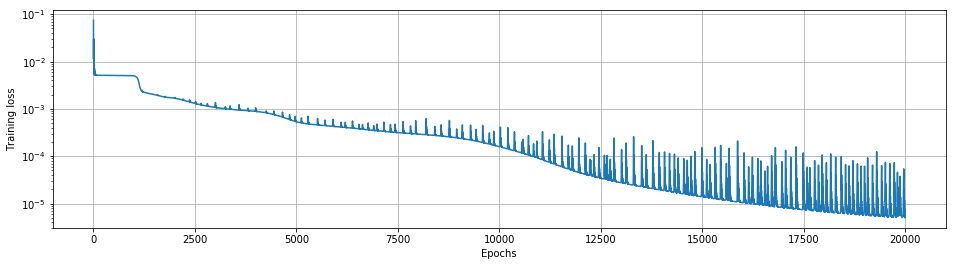

In [7]:
plt.figure(figsize=(16,4))
plt.semilogy(keras_history.history['loss'])
plt.ylabel("Training loss")
plt.xlabel("Epochs")
plt.grid();

### Griddata Interpolation

In [8]:
res_griddata = griddata(points=X_train, values=y_train, xi=(grid_x1, grid_x2), method='cubic', fill_value=0)

# Comparison of the Methods

In [13]:
# preparatory work to have the same color map scale for all loss plots
error_griddata = np.abs(res_griddata.T - np.reshape(y_test, (n, n)).T)
error_scikit = np.abs(res_sklearn.T - np.reshape(y_test, (n, n)).T)
error_keras = np.abs(res_keras.T - np.reshape(y_test, (n, n)).T)

combined_data = np.array([error_griddata, error_scikit, error_keras])
_min, _max = np.amin(combined_data), np.amax(combined_data)

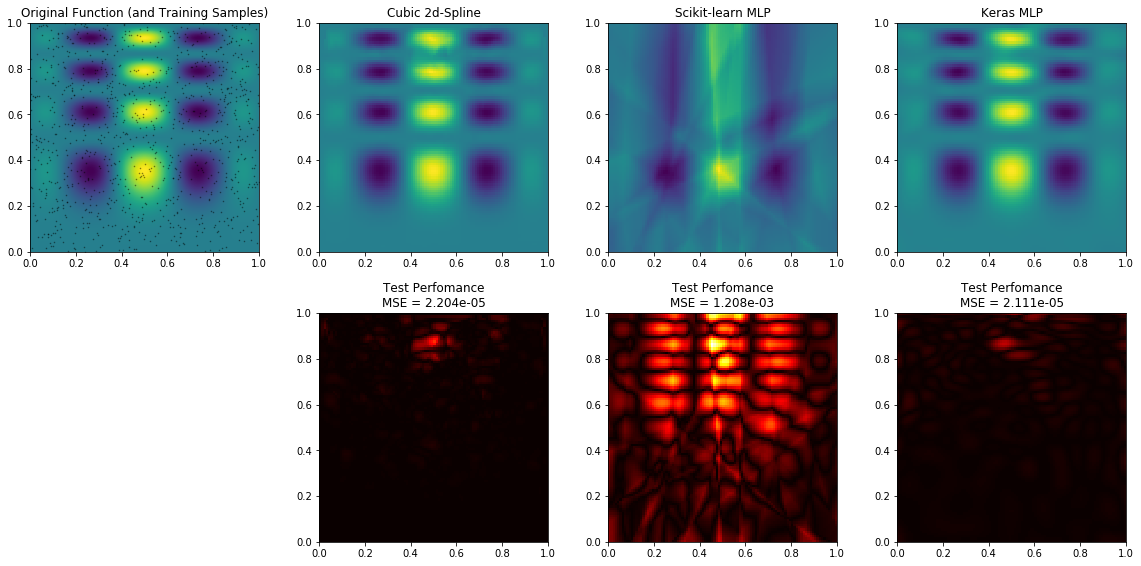

In [14]:
plt.figure(figsize=(16, 8))
# ---
plt.subplot(241)
plt.imshow(func(*np.mgrid[0:1:1000j, 0:1:1000j]).T, extent=(0,1,0,1), origin='lower')
plt.plot(X_train[:,0], X_train[:,1], 'k.', ms=1, alpha=0.5)
plt.title("Original Function (and Training Samples)")
# ---
plt.subplot(242)
plt.imshow(res_griddata.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic 2d-Spline')

plt.subplot(246)
plt.imshow(error_griddata,  extent=(0,1,0,1), origin='lower', cmap='hot', vmin = _min, vmax = _max)
plt.title(f"Test Perfomance\nMSE = {mean_squared_error(res_griddata.reshape(*y_test.shape), y_test):.3e}")
# ---
plt.subplot(243)
plt.imshow(res_sklearn.T, extent=(0,1,0,1), origin='lower')
plt.title("Scikit-learn MLP")

plt.subplot(247)
plt.imshow(error_scikit, extent=(0,1,0,1), origin='lower',  cmap='hot', vmin = _min, vmax = _max)
plt.title(f"Test Perfomance\nMSE = {mean_squared_error(scikit_model.predict(X_test), y_test):.3e}")
# ---
plt.subplot(244)
plt.imshow(res_keras.T, extent=(0,1,0,1), origin='lower')
plt.title("Keras MLP")

plt.subplot(248)
plt.imshow(error_keras, extent=(0,1,0,1), origin='lower',  cmap='hot', vmin = _min, vmax = _max)
plt.title(f"Test Perfomance\nMSE = {mean_squared_error(keras_model.predict(X_test), y_test):.3e}")
# ---
plt.tight_layout()